In [1]:
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab

     |████████████████████████████████| 189 kB 6.9 MB/s 
     |████████████████████████████████| 56 kB 2.6 MB/s 


In [2]:
from fastai.text.all import *

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
# ! cp -r "/content/drive/My Drive/NLP_Project/data/jigsaw1_use_balanced.zip" .
# ! cp -r "/content/drive/My Drive/NLP_Project/data/jigsaw1_use_balanced_tok.zip" .
! mkdir "jigsaw1_use_balanced/models"
! cp -r "/content/drive/My Drive/NLP_Project/data/models/acc88_6.pth" "jigsaw1_use_balanced/models"
# ! unzip jigsaw1_use_balanced.zip
# ! unzip jigsaw1_use_balanced_tok.zip


In [18]:
data_path = Path("jigsaw1_use_balanced/")
dls = TextDataLoaders.from_folder(path=data_path,train='train', valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

In [19]:
learn.load("/content/acc88_6")

SuggestedLRs(valley=0.00015848931798245758)

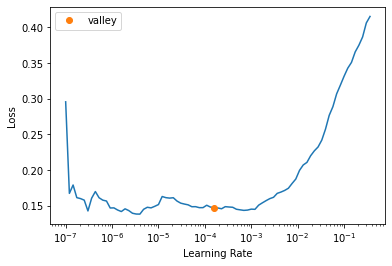

In [30]:
learn.lr_find()

In [17]:
learn.fine_tune(1, 5e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.118936,0.480530,0.881227,01:26


epoch,train_loss,valid_loss,accuracy,time
0,0.116166,0.437216,0.886513,01:57


In [28]:
learn.fine_tune(4, 5e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.170823,0.394887,0.877783,01:03


epoch,train_loss,valid_loss,accuracy,time
0,0.169375,0.397712,0.877142,01:43
1,0.199163,0.393543,0.876181,01:45
2,0.164312,0.408314,0.877463,01:43
3,0.166045,0.397046,0.880586,01:44


In [31]:
learn.unfreeze()
learn.fit_one_cycle(4, 1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.161270,0.386932,0.881387,01:44
1,0.150634,0.399141,0.883069,01:44
2,0.132452,0.417661,0.885231,01:43
3,0.129382,0.403247,0.886112,01:44


In [33]:
learn.save("acc88_6")
pickle.dump(dls.vocab, open("jigsaw1_lm.pickle", 'wb'))

In [47]:
# ! zip -r jigsaw1_use_balanced_tok.zip jigsaw1_use_balanced_tok
# ! cp jigsaw1_use_balanced_tok.zip "/content/drive/My Drive/NLP_Project/data/"
# ! cp jigsaw1_lm.pickle "/content/drive/My Drive/NLP_Project/data/"
# ! cp -r "jigsaw1_use_balanced/models/acc88_6.pth" "/content/drive/My Drive/NLP_Project/data/models/"

In [59]:
learn.predict("i hate men")

('toxic', TensorText(1), TensorText([0.0035, 0.9965]))

In [63]:
! cp -r "/content/drive/My Drive/NLP_Project/data/jigsaw3.zip" .
! unzip jigsaw3.zip

Archive:  jigsaw3.zip
  inflating: comments_to_score.csv   
  inflating: sample_submission.csv   
  inflating: validation_data.csv     


In [66]:
from tqdm import tqdm
trainfile = "comments_to_score.csv"
data =  pd.read_csv(trainfile)
data

,comment_id,text
0,114890,"""\n \n\nGjalexei, you asked about whether there is an """"anti-editorializing"""" policy here. There is, and it's called wikipedia:neutral point of view. It discusses at some length the case of what we should do when writing about a subject which most of us find repugnant. Whilst you're not likely to get too many defenders of FGM here, the need for the policy should be clearer for articles like abortion, for instance.\n\nIf something you write is edited and you're not sure why, please continue to question such edits on the talk page. Sometimes, you'll learn more about wikipedia policy. S..."
1,732895,"Looks like be have an abuser , can you please look into this? thanks."
2,1139051,"I confess to having complete (and apparently blissful) ignorance of Jordan, but I've glanced at the article. Is this a woman or a soap opera!?. I don't think there was much to change in terms of the description of the various diseases. It is mentioned that she is famous for the size of her breasts: am I correct in assuming this is because they are grotesquely large rather than vanishingly small? 04:09 11 Jul 2003 (UTC)"
3,1434512,"""\n\nFreud's ideas are certainly much discussed today, and I would be the first to agree that they must be grappled with and dealt with seriously, if only because of their currency. So Freud deserves a long and thorough article in Wikipedia. I believe that a balanced article would include A) explanations of Freud's theories, and B) the status of Freudianism today. The existing article is quite thorough on """"A"""" and had almost nothing on """"B"""". A neophyte who read the article as it stood a month ago would imagine that Freud's work has the same relation to current psychology that Darwin'..."
4,2084821,It is not just you. This is a laundry list of stupid allegations scooped up from god-knows-where. Probably two-thirds of it has little basis in fact.
...,...,...
7532,504235362,"Go away, you annoying vandal."
7533,504235566,This user is a vandal.
7534,504308177,""" \n\nSorry to sound like a pain, but one by following me here is a tad stalking in all honesty but I'm not too bothered about that. But the main worry is that you have just assumed badly that I was referring about you, when it is clear I wasn't. One should never jump to conclusions without checking facts. And if you read my post above more carefully the line reads """"I got accused on an Olympic article's talk page about being a liar and not being a volunteer"""" - please tell me where in that line did I mention an IP or anyone for that matter - I said I got accused; and I even told you on..."
7535,504570375,Well it's pretty fucking irrelevant now I'm unblocked aint it! 81.108.7.13


In [75]:
outfile = open("submission.csv",'w')
outfile.write("{},{}\n".format("comment_id", "score"))
for index, row in tqdm(data.iterrows()):
  id = row['comment_id']
  pred = learn.predict(row['text'])
  score = float(pred[2][1])
  outfile.write("{},{}\n".format(id, score))
  # break

outfile.close() 

0it [00:00, ?it/s]

2it [00:00, 19.72it/s]

4it [00:00, 14.85it/s]

7it [00:00, 16.24it/s]

10it [00:00, 19.32it/s]

12it [00:00, 17.59it/s]

14it [00:00, 16.97it/s]

16it [00:00, 16.95it/s]

19it [00:01, 18.99it/s]

21it [00:01, 18.80it/s]

23it [00:01, 12.90it/s]

26it [00:01, 15.39it/s]

29it [00:01, 17.09it/s]

32it [00:01, 16.07it/s]

35it [00:02, 17.69it/s]

37it [00:02, 16.67it/s]

39it [00:02, 17.11it/s]

41it [00:02, 17.38it/s]

44it [00:02, 16.61it/s]

46it [00:02, 15.92it/s]

48it [00:02, 16.36it/s]

50it [00:03, 15.36it/s]

53it [00:03, 17.20it/s]

55it [00:03, 16.97it/s]

57it [00:03, 16.62it/s]

59it [00:03, 14.13it/s]

61it [00:03, 15.13it/s]

64it [00:03, 17.20it/s]

66it [00:03, 17.74it/s]

69it [00:04, 20.32it/s]

72it [00:04, 18.44it/s]

75it [00:04, 20.59it/s]

78it [00:04, 21.07it/s]

81it [00:04, 20.05it/s]

84it [00:04, 17.05it/s]

87it [00:05, 18.95it/s]

90it [00:05, 18.80it/s]

93it [00:05, 20.56it/s]

96it [00:05, 22.10it/s]

99it [00:05, 20.90it/s]

102it [00:05, 19.38it/s]

105it [00:05, 19.47it/s]

108it [00:06, 14.34it/s]

110it [00:06, 15.05it/s]

113it [00:06, 16.78it/s]

116it [00:06, 18.08it/s]

119it [00:06, 19.61it/s]

122it [00:07, 14.76it/s]

124it [00:07, 13.60it/s]

126it [00:07, 14.51it/s]

129it [00:07, 16.67it/s]

131it [00:07, 16.89it/s]

133it [00:07, 16.03it/s]

135it [00:07, 16.74it/s]

137it [00:07, 17.14it/s]

139it [00:08, 16.78it/s]

142it [00:08, 18.48it/s]

145it [00:08, 19.64it/s]

147it [00:08, 17.34it/s]

149it [00:08, 15.62it/s]

152it [00:08, 13.21it/s]

155it [00:09, 15.20it/s]

157it [00:09, 15.41it/s]

160it [00:09, 13.33it/s]

162it [00:09, 14.48it/s]

165it [00:09, 16.16it/s]

168it [00:09, 17.93it/s]

170it [00:10, 17.51it/s]

173it [00:10, 19.28it/s]

176it [00:10, 18.42it/s]

178it [00:10, 14.61it/s]

180it [00:10, 15.54it/s]

182it [00:10, 15.39it/s]

185it [00:10, 15.79it/s]

188it [00:11, 17.17it/s]

191it [00:11, 18.69it/s]

194it [00:11, 19.86it/s]

197it [00:11, 18.55it/s]

200it [00:11, 19.15it/s]

203it [00:11, 20.19it/s]

206it [00:12, 17.42it/s]

209it [00:12, 19.03it/s]

212it [00:12, 14.53it/s]

215it [00:12, 16.40it/s]

218it [00:12, 18.16it/s]

221it [00:12, 17.78it/s]

223it [00:13, 14.49it/s]

225it [00:13, 14.49it/s]

227it [00:13, 12.99it/s]

230it [00:13, 13.68it/s]

233it [00:13, 15.82it/s]

236it [00:13, 17.16it/s]

239it [00:14, 17.54it/s]

241it [00:14, 16.40it/s]

243it [00:14, 15.39it/s]

245it [00:14, 15.20it/s]

247it [00:14, 13.51it/s]

249it [00:14, 12.85it/s]

251it [00:15, 12.03it/s]

254it [00:15, 14.29it/s]

257it [00:15, 16.69it/s]

259it [00:15, 17.39it/s]

261it [00:15, 15.72it/s]

263it [00:15, 12.01it/s]

265it [00:16, 10.33it/s]

267it [00:16,  9.25it/s]

269it [00:16, 10.57it/s]

272it [00:16, 13.44it/s]

274it [00:16, 14.62it/s]

276it [00:17, 11.98it/s]

278it [00:17, 13.19it/s]

280it [00:17, 14.37it/s]

282it [00:17, 15.54it/s]

285it [00:17, 15.84it/s]

287it [00:17, 11.32it/s]

289it [00:18, 11.91it/s]

292it [00:18, 14.56it/s]

294it [00:18, 15.60it/s]

296it [00:18, 12.72it/s]

298it [00:18, 10.61it/s]

300it [00:18, 12.18it/s]

302it [00:18, 13.24it/s]

304it [00:19, 12.51it/s]

307it [00:19, 14.72it/s]

310it [00:19, 14.47it/s]

312it [00:19, 15.40it/s]

314it [00:19, 15.66it/s]

316it [00:19, 16.11it/s]

318it [00:20, 13.69it/s]

320it [00:20, 15.01it/s]

322it [00:20, 15.62it/s]

325it [00:20, 16.81it/s]

328it [00:20, 18.30it/s]

331it [00:20, 19.00it/s]

333it [00:20, 15.22it/s]

335it [00:21, 15.88it/s]

338it [00:21, 17.74it/s]

340it [00:21, 16.90it/s]

342it [00:21, 17.14it/s]

345it [00:21, 18.38it/s]

347it [00:21, 18.76it/s]

350it [00:21, 17.11it/s]

353it [00:22, 17.46it/s]

356it [00:22, 18.93it/s]

358it [00:22, 18.29it/s]

361it [00:22, 18.85it/s]

363it [00:22, 18.29it/s]

366it [00:22, 19.15it/s]

368it [00:22, 17.21it/s]

370it [00:22, 17.28it/s]

372it [00:23, 17.63it/s]

374it [00:23, 17.01it/s]

377it [00:23, 17.72it/s]

379it [00:23, 16.46it/s]

381it [00:23, 13.53it/s]

383it [00:23, 14.29it/s]

385it [00:24, 10.65it/s]

388it [00:24, 13.66it/s]

391it [00:24, 15.03it/s]

394it [00:24, 11.91it/s]

397it [00:24, 13.81it/s]

399it [00:25, 14.18it/s]

401it [00:25, 14.31it/s]

403it [00:25, 11.53it/s]

405it [00:25, 12.06it/s]

408it [00:25, 14.20it/s]

410it [00:25, 15.23it/s]

413it [00:25, 17.62it/s]

416it [00:26, 19.04it/s]

419it [00:26, 17.88it/s]

421it [00:26, 17.81it/s]

424it [00:26, 19.66it/s]

427it [00:26, 18.60it/s]

429it [00:26, 17.25it/s]

432it [00:27, 18.32it/s]

434it [00:27, 16.51it/s]

437it [00:27, 18.42it/s]

440it [00:27, 19.70it/s]

443it [00:27, 19.74it/s]

446it [00:27, 19.27it/s]

449it [00:27, 20.45it/s]

452it [00:28, 12.30it/s]

454it [00:28,  9.28it/s]

456it [00:28, 10.51it/s]

458it [00:28, 11.75it/s]

461it [00:29, 14.21it/s]

464it [00:29, 16.68it/s]

467it [00:29, 17.88it/s]

470it [00:29, 15.32it/s]

473it [00:29, 16.38it/s]

476it [00:29, 18.37it/s]

479it [00:30, 19.71it/s]

482it [00:30, 17.85it/s]

485it [00:30, 19.05it/s]

488it [00:30, 19.94it/s]

491it [00:30, 20.78it/s]

494it [00:30, 19.45it/s]

497it [00:30, 20.19it/s]

500it [00:31, 18.53it/s]

502it [00:31, 18.66it/s]

505it [00:31, 20.15it/s]

508it [00:31, 20.16it/s]

511it [00:31, 15.59it/s]

513it [00:31, 16.16it/s]

516it [00:32, 17.38it/s]

518it [00:32, 17.45it/s]

521it [00:32, 19.54it/s]

524it [00:32, 19.36it/s]

527it [00:32, 18.37it/s]

530it [00:32, 19.61it/s]

533it [00:32, 19.68it/s]

536it [00:33, 18.94it/s]

539it [00:33, 19.14it/s]

542it [00:33, 19.82it/s]

545it [00:33, 21.07it/s]

548it [00:33, 20.76it/s]

551it [00:33, 19.04it/s]

554it [00:33, 19.64it/s]

557it [00:34, 18.10it/s]

560it [00:34, 18.97it/s]

563it [00:34, 19.32it/s]

565it [00:34, 18.03it/s]

568it [00:34, 16.53it/s]

570it [00:34, 16.77it/s]

572it [00:35, 13.23it/s]

575it [00:35, 15.57it/s]

578it [00:35, 15.25it/s]

581it [00:35, 17.02it/s]

584it [00:35, 13.63it/s]

586it [00:36, 14.17it/s]

589it [00:36, 16.30it/s]

592it [00:36, 17.61it/s]

594it [00:36, 17.97it/s]

596it [00:36, 18.04it/s]

598it [00:36, 17.65it/s]

600it [00:36, 17.27it/s]

602it [00:36, 17.37it/s]

604it [00:37, 16.70it/s]

607it [00:37, 17.44it/s]

609it [00:37, 16.11it/s]

612it [00:37, 17.86it/s]

614it [00:37, 18.02it/s]

616it [00:37, 13.30it/s]

618it [00:37, 14.26it/s]

620it [00:38, 15.05it/s]

622it [00:38,  7.99it/s]

624it [00:38,  9.11it/s]

626it [00:38, 10.65it/s]

629it [00:38, 13.34it/s]

632it [00:39, 15.04it/s]

634it [00:39, 15.49it/s]

636it [00:39, 12.11it/s]

639it [00:39, 14.16it/s]

641it [00:39, 13.52it/s]

643it [00:39, 14.80it/s]

645it [00:40, 13.30it/s]

647it [00:40, 13.86it/s]

650it [00:40, 16.41it/s]

653it [00:40, 18.25it/s]

655it [00:40, 17.30it/s]

658it [00:40, 18.90it/s]

660it [00:40, 17.81it/s]

662it [00:41, 15.66it/s]

664it [00:41, 16.28it/s]

666it [00:41, 16.74it/s]

669it [00:41, 17.93it/s]

672it [00:41, 19.30it/s]

675it [00:41, 17.03it/s]

678it [00:41, 18.45it/s]

680it [00:42, 18.24it/s]

683it [00:42, 15.19it/s]

686it [00:42, 16.44it/s]

688it [00:42, 15.76it/s]

690it [00:42, 16.32it/s]

692it [00:42, 16.82it/s]

694it [00:42, 15.45it/s]

696it [00:43, 15.85it/s]

698it [00:43, 16.65it/s]

700it [00:43, 17.03it/s]

702it [00:43, 15.11it/s]

705it [00:43, 16.81it/s]

707it [00:43, 17.50it/s]

709it [00:43, 16.99it/s]

711it [00:44, 16.44it/s]

714it [00:44, 18.07it/s]

717it [00:44, 19.67it/s]

719it [00:44, 19.23it/s]

721it [00:44, 18.19it/s]

723it [00:44, 17.60it/s]

725it [00:44, 17.14it/s]

727it [00:44, 16.84it/s]

729it [00:44, 17.38it/s]

731it [00:45, 17.51it/s]

733it [00:45, 15.66it/s]

736it [00:45, 17.73it/s]

738it [00:45, 18.24it/s]

741it [00:45, 19.06it/s]

743it [00:45, 16.23it/s]

745it [00:45, 17.02it/s]

748it [00:46, 17.14it/s]

751it [00:46, 19.20it/s]

753it [00:46, 17.61it/s]

755it [00:46, 18.12it/s]

757it [00:46, 18.34it/s]

759it [00:46, 18.76it/s]

761it [00:46, 16.24it/s]

763it [00:46, 15.94it/s]

765it [00:47, 15.15it/s]

767it [00:47, 13.71it/s]

769it [00:47, 12.98it/s]

771it [00:47, 13.84it/s]

774it [00:47, 16.00it/s]

776it [00:47, 15.72it/s]

779it [00:47, 17.48it/s]

781it [00:48, 15.72it/s]

783it [00:48, 14.12it/s]

785it [00:48, 15.30it/s]

787it [00:48, 14.47it/s]

789it [00:48, 14.97it/s]

791it [00:48, 15.44it/s]

793it [00:48, 15.37it/s]

795it [00:49, 16.22it/s]

797it [00:49, 16.25it/s]

800it [00:49, 18.01it/s]

802it [00:49, 18.19it/s]

804it [00:49, 18.49it/s]

806it [00:49, 15.02it/s]

808it [00:49, 15.31it/s]

810it [00:50, 14.49it/s]

812it [00:50, 15.49it/s]

814it [00:50, 16.00it/s]

816it [00:50, 16.63it/s]

818it [00:50, 16.60it/s]

820it [00:50, 17.25it/s]

822it [00:50, 16.03it/s]

824it [00:50, 12.78it/s]

826it [00:51, 13.25it/s]

828it [00:51, 14.43it/s]

831it [00:51, 16.07it/s]

834it [00:51, 17.53it/s]

836it [00:51, 17.86it/s]

838it [00:51, 17.98it/s]

840it [00:51, 15.35it/s]

842it [00:52, 15.85it/s]

844it [00:52, 15.45it/s]

846it [00:52, 16.25it/s]

849it [00:52, 17.00it/s]

851it [00:52, 17.54it/s]

853it [00:52, 17.10it/s]

855it [00:52, 16.70it/s]

857it [00:52, 16.84it/s]

859it [00:53, 17.35it/s]

861it [00:53, 17.71it/s]

864it [00:53, 19.06it/s]

866it [00:53, 18.55it/s]

868it [00:53, 15.66it/s]

870it [00:53, 16.10it/s]

872it [00:53, 16.93it/s]

875it [00:53, 18.62it/s]

878it [00:54, 19.95it/s]

881it [00:54, 19.62it/s]

883it [00:54, 19.16it/s]

885it [00:54, 18.26it/s]

888it [00:54, 18.98it/s]

890it [00:54, 18.52it/s]

892it [00:54, 16.73it/s]

895it [00:54, 18.49it/s]

897it [00:55, 16.81it/s]

899it [00:55, 15.96it/s]

901it [00:55, 14.99it/s]

903it [00:55, 13.75it/s]

905it [00:55, 14.31it/s]

907it [00:55, 14.44it/s]

909it [00:55, 15.31it/s]

912it [00:56, 17.47it/s]

915it [00:56, 18.79it/s]

918it [00:56, 20.38it/s]

921it [00:56, 21.04it/s]

924it [00:56, 20.95it/s]

927it [00:56, 19.09it/s]

930it [00:56, 19.84it/s]

933it [00:57, 20.99it/s]

936it [00:57, 20.21it/s]

939it [00:57, 20.77it/s]

942it [00:57, 21.45it/s]

945it [00:57, 17.27it/s]

947it [00:57, 16.58it/s]

949it [00:58, 17.02it/s]

951it [00:58, 15.34it/s]

953it [00:58, 15.58it/s]

955it [00:58, 16.02it/s]

957it [00:58, 16.63it/s]

959it [00:58, 16.20it/s]

961it [00:58, 12.95it/s]

963it [00:59, 11.55it/s]

965it [00:59, 12.90it/s]

967it [00:59, 14.41it/s]

969it [00:59, 15.63it/s]

972it [00:59, 16.39it/s]

974it [00:59, 15.13it/s]

976it [00:59, 15.37it/s]

978it [01:00, 15.31it/s]

980it [01:00, 15.44it/s]

982it [01:00, 16.38it/s]

984it [01:00, 16.72it/s]

987it [01:00, 18.11it/s]

989it [01:00, 17.86it/s]

991it [01:00, 17.76it/s]

993it [01:00, 17.84it/s]

995it [01:00, 17.69it/s]

998it [01:01, 19.77it/s]

1001it [01:01, 20.78it/s]

1004it [01:01, 14.54it/s]

1006it [01:01, 15.48it/s]

1008it [01:01, 14.58it/s]

1010it [01:01, 15.47it/s]

1012it [01:02, 13.68it/s]

1014it [01:02, 14.54it/s]

1016it [01:02, 13.36it/s]

1018it [01:02, 14.66it/s]

1020it [01:02, 15.58it/s]

1022it [01:02, 14.75it/s]

1024it [01:02, 13.76it/s]

1026it [01:03, 13.62it/s]

1028it [01:03, 14.13it/s]

1030it [01:03, 15.15it/s]

1033it [01:03, 17.55it/s]

1036it [01:03, 19.24it/s]

1039it [01:03, 19.82it/s]

1041it [01:03, 19.46it/s]

1044it [01:03, 19.82it/s]

1046it [01:04, 17.99it/s]

1048it [01:04, 11.64it/s]

1051it [01:04, 13.66it/s]

1053it [01:04, 14.77it/s]

1056it [01:04, 15.67it/s]

1058it [01:04, 16.27it/s]

1061it [01:05, 17.52it/s]

1063it [01:05, 17.67it/s]

1065it [01:05, 17.99it/s]

1067it [01:05, 16.79it/s]

1070it [01:05, 17.25it/s]

1073it [01:05, 18.93it/s]

1075it [01:05, 18.82it/s]

1077it [01:06, 15.75it/s]

1079it [01:06, 16.52it/s]

1081it [01:06, 15.93it/s]

1083it [01:06, 16.35it/s]

1086it [01:06, 18.43it/s]

1088it [01:06, 17.53it/s]

1091it [01:06, 19.29it/s]

1094it [01:06, 20.99it/s]

1097it [01:07, 21.00it/s]

1100it [01:07, 21.68it/s]

1103it [01:07, 21.57it/s]

1106it [01:07, 22.67it/s]

1109it [01:07, 22.32it/s]

1112it [01:07, 21.25it/s]

1115it [01:07, 19.23it/s]

1117it [01:08, 18.94it/s]

1119it [01:08, 16.11it/s]

1122it [01:08, 18.02it/s]

1125it [01:08, 19.19it/s]

1128it [01:08, 19.10it/s]

1131it [01:08, 19.62it/s]

1134it [01:08, 20.77it/s]

1137it [01:09, 21.85it/s]

1140it [01:09, 21.65it/s]

1143it [01:09, 20.88it/s]

1146it [01:09, 21.08it/s]

1149it [01:09, 21.28it/s]

1152it [01:09, 16.61it/s]

1154it [01:10, 16.94it/s]

1156it [01:10, 16.83it/s]

1158it [01:10, 16.54it/s]

1161it [01:10, 18.26it/s]

1163it [01:10, 18.18it/s]

1166it [01:10, 15.68it/s]

1169it [01:10, 16.84it/s]

1172it [01:11, 17.90it/s]

1174it [01:11, 16.51it/s]

1177it [01:11, 17.61it/s]

1179it [01:11, 17.33it/s]

1181it [01:11, 15.74it/s]

1183it [01:11, 16.00it/s]

1186it [01:11, 17.94it/s]

1188it [01:11, 18.36it/s]

1191it [01:12, 19.29it/s]

1194it [01:12, 19.71it/s]

1196it [01:12, 19.49it/s]

1199it [01:12, 21.00it/s]

1202it [01:12, 18.91it/s]

1205it [01:12, 19.46it/s]

1207it [01:12, 17.77it/s]

1209it [01:13, 16.81it/s]

1211it [01:13, 17.53it/s]

1213it [01:13, 17.54it/s]

1216it [01:13, 18.17it/s]

1218it [01:13, 17.73it/s]

1220it [01:13, 14.81it/s]

1222it [01:13, 14.94it/s]

1224it [01:14, 16.01it/s]

1227it [01:14, 17.95it/s]

1230it [01:14, 19.06it/s]

1233it [01:14, 20.38it/s]

1236it [01:14, 13.02it/s]

1238it [01:14, 13.36it/s]

1240it [01:15, 14.43it/s]

1242it [01:15, 15.30it/s]

1244it [01:15, 15.62it/s]

1246it [01:15, 10.64it/s]

1249it [01:15, 12.24it/s]

1251it [01:16, 11.65it/s]

1254it [01:16, 14.20it/s]

1256it [01:16, 14.84it/s]

1258it [01:16, 15.78it/s]

1261it [01:16, 17.98it/s]

1263it [01:16, 17.31it/s]

1266it [01:16, 18.76it/s]

1268it [01:16, 18.00it/s]

1271it [01:17, 17.66it/s]

1274it [01:17, 18.13it/s]

1276it [01:17, 17.24it/s]

1278it [01:17, 16.76it/s]

1280it [01:17, 16.35it/s]

1282it [01:17, 16.87it/s]

1284it [01:17, 15.69it/s]

1286it [01:17, 16.60it/s]

1288it [01:18, 15.86it/s]

1290it [01:18, 16.86it/s]

1293it [01:18, 17.50it/s]

1295it [01:18, 17.14it/s]

1297it [01:18, 15.50it/s]

1299it [01:18, 16.20it/s]

1302it [01:18, 18.22it/s]

1305it [01:19, 20.02it/s]

1308it [01:19, 17.35it/s]

1311it [01:19, 17.52it/s]

1313it [01:19, 15.03it/s]

1316it [01:19, 16.24it/s]

1318it [01:19, 15.83it/s]

1320it [01:20, 14.39it/s]

1322it [01:20, 15.28it/s]

1324it [01:20, 16.17it/s]

1326it [01:20, 15.51it/s]

1328it [01:20, 15.31it/s]

1330it [01:20, 14.40it/s]

1332it [01:20, 13.26it/s]

1335it [01:21, 15.36it/s]

1337it [01:21, 16.38it/s]

1339it [01:21, 17.23it/s]

1342it [01:21, 18.74it/s]

1344it [01:21, 16.94it/s]

1347it [01:21, 18.54it/s]

1350it [01:21, 19.34it/s]

1352it [01:21, 18.85it/s]

1354it [01:22, 18.97it/s]

1356it [01:22, 18.29it/s]

1359it [01:22, 17.60it/s]

1362it [01:22, 18.94it/s]

1364it [01:22, 18.66it/s]

1367it [01:22, 19.57it/s]

1369it [01:22, 19.35it/s]

1371it [01:22, 19.34it/s]

1373it [01:23, 18.80it/s]

1375it [01:23, 16.78it/s]

1377it [01:23, 17.07it/s]

1380it [01:23, 18.23it/s]

1383it [01:23, 18.32it/s]

1386it [01:23, 19.52it/s]

1388it [01:24, 12.21it/s]

1390it [01:24, 12.37it/s]

1393it [01:24, 14.77it/s]

1395it [01:24, 15.35it/s]

1398it [01:24, 17.56it/s]

1401it [01:24, 19.10it/s]

1404it [01:24, 19.91it/s]

1407it [01:25, 17.68it/s]

1409it [01:25, 17.04it/s]

1411it [01:25, 17.69it/s]

1413it [01:25, 18.05it/s]

1416it [01:25, 19.07it/s]

1418it [01:25, 18.37it/s]

1420it [01:25, 16.20it/s]

1422it [01:26, 11.94it/s]

1425it [01:26, 14.40it/s]

1428it [01:26, 16.99it/s]

1430it [01:26, 12.42it/s]

1432it [01:26, 13.03it/s]

1434it [01:26, 14.29it/s]

1436it [01:27, 14.76it/s]

1438it [01:27, 12.23it/s]

1440it [01:27, 13.55it/s]

1443it [01:27, 16.09it/s]

1445it [01:27, 16.02it/s]

1447it [01:27, 15.94it/s]

1449it [01:27, 16.60it/s]

1451it [01:28, 16.44it/s]

1453it [01:28, 17.20it/s]

1455it [01:28, 16.94it/s]

1457it [01:28, 17.01it/s]

1459it [01:28, 16.07it/s]

1461it [01:28, 13.91it/s]

1463it [01:28, 14.56it/s]

1465it [01:28, 13.38it/s]

1468it [01:29, 11.35it/s]

1470it [01:29, 12.51it/s]

1472it [01:29, 13.89it/s]

1474it [01:29, 14.14it/s]

1476it [01:29, 15.42it/s]

1479it [01:29, 17.58it/s]

1481it [01:30, 17.65it/s]

1484it [01:30, 19.75it/s]

1487it [01:30, 18.78it/s]

1489it [01:30, 13.67it/s]

1491it [01:30, 14.11it/s]

1493it [01:30, 14.92it/s]

1495it [01:30, 14.98it/s]

1497it [01:31, 14.18it/s]

1499it [01:31, 15.12it/s]

1502it [01:31, 16.77it/s]

1505it [01:31, 18.35it/s]

1507it [01:31, 18.33it/s]

1510it [01:31, 18.61it/s]

1512it [01:31, 18.46it/s]

1515it [01:32, 17.16it/s]

1517it [01:32, 14.93it/s]

1519it [01:32, 15.62it/s]

1521it [01:32, 16.25it/s]

1523it [01:32, 15.03it/s]

1525it [01:32, 15.92it/s]

1527it [01:32, 16.73it/s]

1530it [01:32, 18.64it/s]

1532it [01:33, 18.81it/s]

1534it [01:33, 17.12it/s]

1536it [01:33, 17.12it/s]

1539it [01:33, 16.98it/s]

1541it [01:33, 16.50it/s]

1544it [01:33, 17.54it/s]

1546it [01:33, 17.77it/s]

1549it [01:34, 19.97it/s]

1552it [01:34, 20.95it/s]

1555it [01:34, 15.37it/s]

1557it [01:34, 15.77it/s]

1559it [01:34, 16.29it/s]

1562it [01:34, 17.15it/s]

1564it [01:34, 16.69it/s]

1566it [01:35, 15.31it/s]

1569it [01:35, 17.90it/s]

1571it [01:35, 15.58it/s]

1573it [01:35, 16.44it/s]

1575it [01:35, 16.97it/s]

1577it [01:35, 17.62it/s]

1580it [01:35, 16.44it/s]

1583it [01:36, 18.15it/s]

1586it [01:36, 18.67it/s]

1588it [01:36, 18.73it/s]

1591it [01:36, 20.47it/s]

1594it [01:36, 21.62it/s]

1597it [01:36, 21.64it/s]

1600it [01:36, 18.41it/s]

1602it [01:37, 16.61it/s]

1604it [01:37, 16.68it/s]

1606it [01:37, 15.15it/s]

1608it [01:37, 14.63it/s]

1611it [01:37, 16.56it/s]

1613it [01:37, 17.25it/s]

1615it [01:37, 17.55it/s]

1618it [01:38, 18.48it/s]

1620it [01:38, 17.63it/s]

1623it [01:38, 19.40it/s]

1626it [01:38, 21.37it/s]

1629it [01:38, 20.18it/s]

1632it [01:38, 19.05it/s]

1634it [01:38, 18.30it/s]

1637it [01:39, 19.39it/s]

1640it [01:39, 19.60it/s]

1642it [01:39, 11.11it/s]

1645it [01:39, 13.29it/s]

1648it [01:39, 15.73it/s]

1650it [01:39, 16.47it/s]

1653it [01:40, 17.61it/s]

1656it [01:40, 17.95it/s]

1659it [01:40, 18.65it/s]

1661it [01:40, 18.66it/s]

1664it [01:40, 19.46it/s]

1667it [01:40, 18.42it/s]

1670it [01:40, 19.67it/s]

1673it [01:41, 20.15it/s]

1676it [01:41, 14.72it/s]

1678it [01:41, 15.37it/s]

1680it [01:41, 16.15it/s]

1683it [01:41, 17.95it/s]

1685it [01:41, 18.09it/s]

1687it [01:42, 17.24it/s]

1689it [01:42, 17.19it/s]

1692it [01:42, 18.28it/s]

1694it [01:42, 15.68it/s]

1697it [01:42, 14.38it/s]

1700it [01:42, 15.78it/s]

1702it [01:42, 16.57it/s]

1704it [01:43, 15.37it/s]

1706it [01:43, 15.13it/s]

1709it [01:43, 17.27it/s]

1712it [01:43, 19.31it/s]

1714it [01:43, 17.62it/s]

1717it [01:43, 19.32it/s]

1719it [01:43, 19.18it/s]

1722it [01:44, 19.87it/s]

1725it [01:44, 19.80it/s]

1727it [01:44, 17.16it/s]

1730it [01:44, 18.45it/s]

1732it [01:44, 18.38it/s]

1735it [01:44, 20.24it/s]

1738it [01:44, 20.04it/s]

1741it [01:45, 18.74it/s]

1743it [01:45, 18.86it/s]

1745it [01:45, 18.99it/s]

1747it [01:45, 17.94it/s]

1749it [01:45, 17.87it/s]

1752it [01:45, 19.69it/s]

1755it [01:45, 20.34it/s]

1758it [01:45, 21.12it/s]

1761it [01:46, 21.73it/s]

1764it [01:46, 20.93it/s]

1767it [01:46, 19.86it/s]

1770it [01:46, 21.00it/s]

1773it [01:46, 18.96it/s]

1776it [01:46, 19.95it/s]

1779it [01:46, 19.09it/s]

1781it [01:47, 17.21it/s]

1783it [01:47, 17.76it/s]

1786it [01:47, 18.86it/s]

1788it [01:47, 18.94it/s]

1790it [01:47, 14.42it/s]

1793it [01:47, 16.39it/s]

1795it [01:47, 15.68it/s]

1798it [01:48, 17.85it/s]

1800it [01:48, 18.32it/s]

1803it [01:48, 19.07it/s]

1805it [01:48, 16.99it/s]

1807it [01:48, 12.15it/s]

1809it [01:48, 12.83it/s]

1811it [01:49, 13.60it/s]

1814it [01:49, 14.71it/s]

1816it [01:49, 15.62it/s]

1819it [01:49, 17.40it/s]

1821it [01:49, 17.09it/s]

1823it [01:49, 17.52it/s]

1825it [01:49, 17.76it/s]

1827it [01:50, 13.74it/s]

1830it [01:50, 16.06it/s]

1832it [01:50, 15.66it/s]

1834it [01:50, 16.64it/s]

1836it [01:50, 17.18it/s]

1838it [01:50, 15.63it/s]

1841it [01:50, 17.68it/s]

1843it [01:50, 15.86it/s]

1845it [01:51, 16.54it/s]

1847it [01:51, 16.85it/s]

1850it [01:51, 18.18it/s]

1853it [01:51, 18.82it/s]

1855it [01:51, 16.49it/s]

1857it [01:51, 16.57it/s]

1860it [01:51, 17.58it/s]

1863it [01:52, 17.89it/s]

1866it [01:52, 19.31it/s]

1869it [01:52, 19.55it/s]

1872it [01:52, 20.92it/s]

1875it [01:52, 20.68it/s]

1878it [01:52, 19.71it/s]

1880it [01:52, 18.34it/s]

1883it [01:53, 19.61it/s]

1885it [01:53, 19.08it/s]

1887it [01:53, 17.23it/s]

1889it [01:53, 16.36it/s]

1891it [01:53, 14.85it/s]

1894it [01:53, 16.46it/s]

1896it [01:53, 17.03it/s]

1898it [01:54, 17.61it/s]

1900it [01:54, 17.83it/s]

1902it [01:54, 18.04it/s]

1905it [01:54, 19.42it/s]

1908it [01:54, 20.28it/s]

1911it [01:54, 18.56it/s]

1913it [01:54, 18.69it/s]

1915it [01:54, 18.84it/s]

1917it [01:55, 18.27it/s]

1920it [01:55, 20.30it/s]

1923it [01:55, 19.31it/s]

1926it [01:55, 19.85it/s]

1929it [01:55, 19.04it/s]

1931it [01:55, 17.10it/s]

1933it [01:56, 12.29it/s]

1935it [01:56, 13.24it/s]

1938it [01:56, 15.23it/s]

1940it [01:56, 15.75it/s]

1942it [01:56, 15.75it/s]

1944it [01:56, 13.85it/s]

1947it [01:56, 16.10it/s]

1950it [01:57, 18.27it/s]

1953it [01:57, 18.06it/s]

1956it [01:57, 19.29it/s]

1959it [01:57, 20.53it/s]

1962it [01:57, 18.24it/s]

1964it [01:57, 18.52it/s]

1966it [01:57, 18.81it/s]

1968it [01:57, 17.84it/s]

1970it [01:58, 17.49it/s]

1972it [01:58, 13.66it/s]

1975it [01:58, 14.98it/s]

1977it [01:58, 15.65it/s]

1979it [01:58, 13.66it/s]

1981it [01:58, 14.66it/s]

1983it [01:59, 15.67it/s]

1986it [01:59, 17.87it/s]

1988it [01:59, 15.79it/s]

1990it [01:59, 15.86it/s]

1993it [01:59, 18.26it/s]

1996it [01:59, 19.12it/s]

1999it [01:59, 19.15it/s]

2001it [01:59, 19.20it/s]

2004it [02:00, 19.52it/s]

2006it [02:00, 19.35it/s]

2009it [02:00, 20.11it/s]

2012it [02:00, 17.90it/s]

2015it [02:00, 19.30it/s]

2018it [02:00, 19.09it/s]

2021it [02:01, 19.90it/s]

2024it [02:01, 20.04it/s]

2027it [02:01, 18.94it/s]

2030it [02:01, 19.89it/s]

2033it [02:01, 20.47it/s]

2036it [02:01, 19.48it/s]

2039it [02:01, 20.23it/s]

2042it [02:02, 18.72it/s]

2045it [02:02, 19.75it/s]

2048it [02:02, 19.61it/s]

2051it [02:02, 19.87it/s]

2054it [02:02, 16.24it/s]

2056it [02:02, 16.10it/s]

2058it [02:03, 16.23it/s]

2061it [02:03, 17.80it/s]

2063it [02:03, 18.28it/s]

2065it [02:03, 15.85it/s]

2067it [02:03, 16.00it/s]

2070it [02:03, 18.00it/s]

2072it [02:03, 18.10it/s]

2074it [02:04, 15.14it/s]

2076it [02:04, 16.00it/s]

2078it [02:04, 16.62it/s]

2081it [02:04, 18.10it/s]

2083it [02:04, 16.83it/s]

2085it [02:04, 12.04it/s]

2088it [02:04, 14.67it/s]

2090it [02:05, 15.26it/s]

2092it [02:05, 15.64it/s]

2094it [02:05, 15.57it/s]

2097it [02:05, 17.15it/s]

2099it [02:05, 16.37it/s]

2101it [02:05, 16.85it/s]

2103it [02:05, 16.58it/s]

2105it [02:05, 17.12it/s]

2107it [02:06, 17.58it/s]

2109it [02:06, 17.06it/s]

2112it [02:06, 16.37it/s]

2114it [02:06, 12.60it/s]

2116it [02:06, 13.04it/s]

2119it [02:06, 15.34it/s]

2122it [02:07, 16.01it/s]

2124it [02:07, 15.93it/s]

2126it [02:07, 15.26it/s]

2129it [02:07, 17.65it/s]

2131it [02:07, 17.43it/s]

2134it [02:07, 19.07it/s]

2136it [02:07, 17.66it/s]

2138it [02:07, 16.73it/s]

2141it [02:08, 17.51it/s]

2144it [02:08, 18.83it/s]

2147it [02:08, 19.86it/s]

2150it [02:08, 20.09it/s]

2153it [02:08, 19.30it/s]

2155it [02:08, 16.92it/s]

2157it [02:08, 17.01it/s]

2159it [02:09, 17.59it/s]

2161it [02:09, 17.18it/s]

2164it [02:09, 17.70it/s]

2166it [02:09, 17.70it/s]

2169it [02:09, 18.67it/s]

2171it [02:09, 15.41it/s]

2174it [02:09, 17.11it/s]

2176it [02:10, 16.39it/s]

2178it [02:10, 16.81it/s]

2180it [02:10, 16.15it/s]

2183it [02:10, 17.05it/s]

2185it [02:10, 17.13it/s]

2187it [02:10, 17.33it/s]

2189it [02:10, 15.53it/s]

2192it [02:11, 17.34it/s]

2194it [02:11, 17.84it/s]

2197it [02:11, 19.58it/s]

2199it [02:11, 17.89it/s]

2202it [02:11, 18.62it/s]

2204it [02:11, 18.57it/s]

2206it [02:11, 17.65it/s]

2208it [02:11, 17.46it/s]

2210it [02:12, 14.52it/s]

2213it [02:12, 16.24it/s]

2216it [02:12, 18.59it/s]

2218it [02:12, 16.65it/s]

2221it [02:12, 17.70it/s]

2224it [02:12, 18.60it/s]

2226it [02:12, 18.58it/s]

2229it [02:13, 19.83it/s]

2232it [02:13, 21.24it/s]

2235it [02:13, 21.61it/s]

2238it [02:14,  7.82it/s]

2240it [02:14,  9.04it/s]

2242it [02:14, 10.30it/s]

2245it [02:14, 12.59it/s]

2247it [02:14, 13.81it/s]

2249it [02:14, 14.93it/s]

2251it [02:14, 15.93it/s]

2254it [02:15, 13.24it/s]

2256it [02:15, 14.17it/s]

2259it [02:15, 16.28it/s]

2261it [02:15, 16.29it/s]

2263it [02:15, 12.89it/s]

2266it [02:15, 15.07it/s]

2268it [02:16, 15.98it/s]

2271it [02:16, 15.89it/s]

2274it [02:16, 16.91it/s]

2277it [02:16, 18.12it/s]

2279it [02:16, 16.90it/s]

2281it [02:16, 15.59it/s]

2283it [02:16, 15.47it/s]

2285it [02:17, 16.32it/s]

2287it [02:17, 15.36it/s]

2289it [02:17, 14.89it/s]

2292it [02:17, 17.52it/s]

2295it [02:17, 13.19it/s]

2298it [02:18, 13.51it/s]

2300it [02:18, 14.59it/s]

2302it [02:18, 15.51it/s]

2305it [02:18, 17.41it/s]

2307it [02:18, 17.12it/s]

2310it [02:18, 18.16it/s]

2312it [02:19, 11.72it/s]

2314it [02:19, 13.11it/s]

2317it [02:19, 15.26it/s]

2320it [02:19, 17.02it/s]

2323it [02:19, 18.02it/s]

2325it [02:19, 17.91it/s]

2327it [02:19, 18.21it/s]

2329it [02:19, 18.43it/s]

2332it [02:20, 17.79it/s]

2334it [02:20, 15.60it/s]

2336it [02:20, 16.50it/s]

2339it [02:20, 18.25it/s]

2342it [02:20, 18.42it/s]

2344it [02:20, 18.24it/s]

2346it [02:20, 15.45it/s]

2349it [02:21, 17.05it/s]

2351it [02:21, 12.31it/s]

2354it [02:21, 14.94it/s]

2357it [02:21, 16.96it/s]

2360it [02:21, 18.40it/s]

2363it [02:21, 17.22it/s]

2365it [02:22, 16.99it/s]

2367it [02:22, 17.52it/s]

2370it [02:22, 17.56it/s]

2372it [02:22, 16.60it/s]

2375it [02:22, 17.89it/s]

2377it [02:22, 17.76it/s]

2379it [02:22, 14.26it/s]

2382it [02:23, 13.08it/s]

2385it [02:23, 15.77it/s]

2388it [02:23, 17.30it/s]

2390it [02:23, 17.71it/s]

2393it [02:23, 18.86it/s]

2395it [02:23, 17.21it/s]

2397it [02:23, 17.32it/s]

2399it [02:24, 16.08it/s]

2401it [02:24, 16.23it/s]

2404it [02:24, 18.50it/s]

2407it [02:24, 17.22it/s]

2409it [02:24, 15.32it/s]

2412it [02:24, 17.03it/s]

2414it [02:24, 16.97it/s]

2416it [02:25, 17.01it/s]

2418it [02:25, 17.73it/s]

2421it [02:25, 17.97it/s]

2423it [02:25, 12.80it/s]

2425it [02:25, 14.03it/s]

2427it [02:25, 13.95it/s]

2429it [02:26, 13.76it/s]

2432it [02:26, 16.00it/s]

2435it [02:26, 18.51it/s]

2437it [02:26, 17.53it/s]

2439it [02:26, 17.32it/s]

2442it [02:26, 18.56it/s]

2445it [02:26, 19.61it/s]

2447it [02:26, 18.89it/s]

2450it [02:27, 20.06it/s]

2453it [02:27, 19.79it/s]

2455it [02:27, 17.58it/s]

2458it [02:27, 19.06it/s]

2461it [02:27, 17.19it/s]

2463it [02:27, 16.07it/s]

2465it [02:28, 16.08it/s]

2467it [02:28, 16.05it/s]

2469it [02:28, 16.21it/s]

2471it [02:28, 16.94it/s]

2473it [02:28, 16.99it/s]

2475it [02:28, 12.44it/s]

2477it [02:28, 12.77it/s]

2480it [02:29, 15.04it/s]

2483it [02:29, 16.56it/s]

2486it [02:29, 17.94it/s]

2488it [02:29, 17.91it/s]

2490it [02:29, 18.00it/s]

2492it [02:29, 12.56it/s]

2494it [02:30, 11.58it/s]

2497it [02:30, 13.77it/s]

2499it [02:30, 12.49it/s]

2502it [02:30, 14.89it/s]

2504it [02:30, 11.48it/s]

2506it [02:30, 12.22it/s]

2508it [02:31, 12.75it/s]

2510it [02:31, 13.17it/s]

2512it [02:31, 14.21it/s]

2514it [02:31, 15.08it/s]

2516it [02:31, 13.63it/s]

2518it [02:31, 13.63it/s]

2520it [02:31, 14.87it/s]

2522it [02:31, 15.62it/s]

2524it [02:32, 15.14it/s]

2526it [02:32, 14.76it/s]

2528it [02:32, 14.93it/s]

2530it [02:32, 16.09it/s]

2532it [02:32, 16.83it/s]

2535it [02:32, 16.60it/s]

2537it [02:32, 17.06it/s]

2539it [02:33, 17.68it/s]

2541it [02:33, 17.14it/s]

2543it [02:33, 15.11it/s]

2545it [02:33, 11.37it/s]

2547it [02:33, 12.45it/s]

2549it [02:33, 13.08it/s]

2551it [02:34, 12.97it/s]

2553it [02:34, 14.35it/s]

2555it [02:34, 13.86it/s]

2557it [02:34, 15.07it/s]

2559it [02:34, 13.64it/s]

2562it [02:34, 15.78it/s]

2564it [02:34, 14.10it/s]

2566it [02:35, 13.94it/s]

2568it [02:35, 12.81it/s]

2571it [02:35, 15.16it/s]

2573it [02:35, 14.65it/s]

2575it [02:35, 12.83it/s]

2577it [02:35, 13.58it/s]

2579it [02:35, 13.41it/s]

2581it [02:36, 14.45it/s]

2584it [02:36, 16.76it/s]

2586it [02:36, 15.54it/s]

2589it [02:36, 17.73it/s]

2591it [02:36, 16.90it/s]

2594it [02:36, 18.41it/s]

2597it [02:36, 18.11it/s]

2599it [02:37, 17.73it/s]

2602it [02:37, 18.80it/s]

2604it [02:37, 18.58it/s]

2606it [02:37, 17.75it/s]

2608it [02:37, 15.28it/s]

2610it [02:37, 16.03it/s]

2612it [02:37, 15.08it/s]

2615it [02:38, 17.27it/s]

2617it [02:38, 17.43it/s]

2619it [02:38, 17.70it/s]

2621it [02:38, 16.61it/s]

2624it [02:38, 17.40it/s]

2626it [02:38, 13.12it/s]

2628it [02:38, 13.63it/s]

2630it [02:39, 14.74it/s]

2632it [02:39,  8.41it/s]

2635it [02:39, 11.27it/s]

2638it [02:39, 13.81it/s]

2641it [02:40, 11.48it/s]

2643it [02:40,  9.41it/s]

2645it [02:40, 10.01it/s]

2647it [02:40, 10.68it/s]

2649it [02:40, 11.78it/s]

2651it [02:41, 13.29it/s]

2654it [02:41, 15.52it/s]

2656it [02:41, 16.27it/s]

2658it [02:41, 16.07it/s]

2660it [02:41, 16.58it/s]

2663it [02:41, 17.54it/s]

2665it [02:41, 17.43it/s]

2667it [02:41, 17.44it/s]

2669it [02:41, 18.04it/s]

2671it [02:42, 17.96it/s]

2673it [02:42, 18.20it/s]

2676it [02:42, 16.66it/s]

2678it [02:42, 17.39it/s]

2680it [02:42, 17.74it/s]

2683it [02:42, 19.14it/s]

2686it [02:42, 19.84it/s]

2689it [02:43, 11.80it/s]

2692it [02:43, 13.74it/s]

2694it [02:43, 13.51it/s]

2697it [02:43, 15.82it/s]

2700it [02:43, 17.89it/s]

2703it [02:44, 13.50it/s]

2705it [02:44, 14.35it/s]

2708it [02:44, 15.63it/s]

2710it [02:44, 15.49it/s]

2712it [02:44, 15.74it/s]

2714it [02:44, 16.00it/s]

2716it [02:44, 16.61it/s]

2718it [02:45, 17.26it/s]

2720it [02:45, 15.88it/s]

2722it [02:45, 15.60it/s]

2724it [02:45, 15.89it/s]

2726it [02:45, 15.32it/s]

2729it [02:45, 17.28it/s]

2732it [02:45, 18.07it/s]

2735it [02:46, 17.96it/s]

2737it [02:46, 17.81it/s]

2739it [02:46, 17.65it/s]

2741it [02:46, 17.91it/s]

2744it [02:46, 19.82it/s]

2747it [02:46, 21.14it/s]

2750it [02:46, 20.10it/s]

2753it [02:47, 19.41it/s]

2755it [02:47, 17.71it/s]

2758it [02:47, 18.79it/s]

2760it [02:47, 14.43it/s]

2762it [02:47, 12.45it/s]

2764it [02:47, 12.16it/s]

2766it [02:48, 13.57it/s]

2769it [02:48, 14.60it/s]

2772it [02:48, 16.43it/s]

2775it [02:48, 18.30it/s]

2777it [02:48, 16.95it/s]

2779it [02:48, 17.15it/s]

2781it [02:48, 17.03it/s]

2783it [02:49, 15.12it/s]

2785it [02:49, 15.52it/s]

2787it [02:49, 14.90it/s]

2789it [02:49, 13.39it/s]

2791it [02:49, 14.79it/s]

2793it [02:49, 14.76it/s]

2795it [02:49, 15.94it/s]

2797it [02:49, 16.45it/s]

2800it [02:50, 18.20it/s]

2802it [02:50, 16.61it/s]

2804it [02:50, 15.20it/s]

2806it [02:50, 13.97it/s]

2808it [02:50, 14.61it/s]

2810it [02:50, 15.03it/s]

2812it [02:50, 14.88it/s]

2815it [02:51, 16.24it/s]

2817it [02:51, 16.18it/s]

2819it [02:51, 14.70it/s]

2821it [02:51, 15.08it/s]

2824it [02:51, 17.24it/s]

2826it [02:51, 17.10it/s]

2828it [02:51, 17.40it/s]

2830it [02:52, 17.02it/s]

2832it [02:52, 16.79it/s]

2834it [02:52, 17.49it/s]

2836it [02:52, 17.82it/s]

2838it [02:52, 17.58it/s]

2840it [02:52, 17.90it/s]

2842it [02:52, 17.55it/s]

2844it [02:52, 18.14it/s]

2846it [02:52, 16.45it/s]

2849it [02:53, 18.10it/s]

2852it [02:53, 19.14it/s]

2855it [02:53, 20.41it/s]

2858it [02:53, 20.23it/s]

2861it [02:53, 20.88it/s]

2864it [02:53, 20.55it/s]

2867it [02:53, 20.17it/s]

2870it [02:54, 20.72it/s]

2873it [02:54, 20.10it/s]

2876it [02:54, 19.59it/s]

2878it [02:54, 18.54it/s]

2880it [02:54, 15.83it/s]

2883it [02:54, 17.41it/s]

2885it [02:54, 16.49it/s]

2887it [02:55, 14.08it/s]

2889it [02:55, 13.89it/s]

2892it [02:55, 16.09it/s]

2894it [02:55, 14.72it/s]

2896it [02:55, 15.82it/s]

2898it [02:55, 16.46it/s]

2900it [02:56, 14.65it/s]

2902it [02:56, 15.55it/s]

2904it [02:56, 16.58it/s]

2906it [02:56, 17.28it/s]

2909it [02:56, 18.09it/s]

2911it [02:56, 18.29it/s]

2913it [02:56, 16.92it/s]

2915it [02:56, 16.41it/s]

2917it [02:56, 16.12it/s]

2919it [02:57, 15.59it/s]

2921it [02:57, 16.03it/s]

2924it [02:57, 16.91it/s]

2927it [02:57, 18.19it/s]

2929it [02:57, 16.74it/s]

2931it [02:57, 15.41it/s]

2934it [02:58, 15.41it/s]

2936it [02:58, 16.10it/s]

2938it [02:58, 16.17it/s]

2940it [02:58, 16.93it/s]

2942it [02:58, 13.04it/s]

2944it [02:58, 13.43it/s]

2946it [02:58, 14.46it/s]

2948it [02:59, 14.88it/s]

2950it [02:59, 13.62it/s]

2952it [02:59, 14.70it/s]

2954it [02:59, 15.15it/s]

2957it [02:59, 16.89it/s]

2959it [02:59, 15.36it/s]

2961it [02:59, 16.24it/s]

2963it [03:00, 12.65it/s]

2966it [03:00, 14.39it/s]

2968it [03:00, 14.19it/s]

2970it [03:00, 15.23it/s]

2973it [03:00, 17.25it/s]

2976it [03:00, 18.60it/s]

2978it [03:00, 17.90it/s]

2980it [03:01, 17.56it/s]

2982it [03:01, 15.95it/s]

2985it [03:01, 15.39it/s]

2987it [03:01, 16.32it/s]

2990it [03:01, 17.86it/s]

2993it [03:01, 19.03it/s]

2995it [03:01, 18.56it/s]

2997it [03:01, 18.43it/s]

3000it [03:02, 20.01it/s]

3003it [03:02, 20.78it/s]

3006it [03:02, 21.10it/s]

3009it [03:02, 20.78it/s]

3012it [03:02, 20.48it/s]

3015it [03:02, 17.39it/s]

3017it [03:03, 17.10it/s]

3020it [03:03, 17.96it/s]

3022it [03:03, 16.46it/s]

3025it [03:03, 17.31it/s]

3028it [03:03, 18.17it/s]

3030it [03:03, 13.37it/s]

3033it [03:04, 13.11it/s]

3036it [03:04, 14.81it/s]

3038it [03:04, 14.98it/s]

3041it [03:04, 16.69it/s]

3043it [03:04, 15.93it/s]

3045it [03:04, 13.99it/s]

3048it [03:05, 15.93it/s]

3050it [03:05, 15.75it/s]

3053it [03:05, 17.67it/s]

3055it [03:05, 13.15it/s]

3057it [03:05, 14.11it/s]

3060it [03:05, 15.65it/s]

3062it [03:05, 15.78it/s]

3064it [03:06, 16.41it/s]

3066it [03:06, 17.16it/s]

3068it [03:06, 17.32it/s]

3070it [03:06, 17.61it/s]

3072it [03:06, 14.63it/s]

3074it [03:06, 15.85it/s]

3077it [03:06, 15.10it/s]

3079it [03:07, 15.40it/s]

3081it [03:07, 15.21it/s]

3084it [03:07, 16.58it/s]

3086it [03:07, 15.75it/s]

3089it [03:07, 17.09it/s]

3092it [03:07, 18.53it/s]

3095it [03:07, 18.70it/s]

3098it [03:08, 19.10it/s]

3101it [03:08, 19.42it/s]

3103it [03:08, 17.95it/s]

3105it [03:08, 17.35it/s]

3107it [03:08, 17.24it/s]

3110it [03:08, 18.94it/s]

3112it [03:08, 19.09it/s]

3114it [03:08, 18.54it/s]

3116it [03:09, 18.75it/s]

3118it [03:09, 17.32it/s]

3120it [03:09, 17.46it/s]

3122it [03:09, 16.34it/s]

3124it [03:09, 16.70it/s]

3126it [03:09, 17.13it/s]

3128it [03:09, 17.73it/s]

3130it [03:09, 18.22it/s]

3132it [03:09, 18.64it/s]

3134it [03:10, 11.92it/s]

3137it [03:10, 14.49it/s]

3140it [03:10, 16.56it/s]

3142it [03:10, 14.97it/s]

3145it [03:10, 17.26it/s]

3148it [03:10, 18.80it/s]

3151it [03:11, 20.09it/s]

3154it [03:11, 20.43it/s]

3157it [03:11, 20.04it/s]

3160it [03:11, 19.60it/s]

3162it [03:11, 16.83it/s]

3164it [03:11, 15.28it/s]

3166it [03:12, 15.20it/s]

3169it [03:12, 16.35it/s]

3172it [03:12, 15.84it/s]

3174it [03:12, 15.68it/s]

3176it [03:12, 16.09it/s]

3179it [03:12, 16.25it/s]

3181it [03:12, 16.17it/s]

3183it [03:13, 16.83it/s]

3186it [03:13, 18.13it/s]

3188it [03:13, 17.03it/s]

3190it [03:13, 17.02it/s]

3192it [03:13, 17.45it/s]

3194it [03:13, 16.16it/s]

3196it [03:13, 14.82it/s]

3198it [03:13, 15.94it/s]

3200it [03:14, 15.97it/s]

3202it [03:14, 16.87it/s]

3204it [03:14, 16.69it/s]

3206it [03:14, 16.89it/s]

3209it [03:14, 19.01it/s]

3212it [03:14, 20.23it/s]

3215it [03:14, 18.57it/s]

3217it [03:15, 17.03it/s]

3219it [03:15, 16.91it/s]

3221it [03:15, 16.52it/s]

3223it [03:15, 11.55it/s]

3225it [03:15, 12.87it/s]

3227it [03:15, 13.34it/s]

3229it [03:15, 14.72it/s]

3232it [03:16, 16.65it/s]

3235it [03:16, 17.87it/s]

3238it [03:16, 18.79it/s]

3240it [03:16, 18.31it/s]

3242it [03:16, 18.35it/s]

3244it [03:16, 18.36it/s]

3247it [03:16, 19.55it/s]

3249it [03:16, 18.24it/s]

3252it [03:17, 20.06it/s]

3255it [03:17, 20.11it/s]

3258it [03:17, 19.71it/s]

3260it [03:17, 18.97it/s]

3263it [03:17, 20.18it/s]

3266it [03:17, 18.09it/s]

3268it [03:18, 16.02it/s]

3270it [03:18, 16.83it/s]

3272it [03:18, 16.98it/s]

3274it [03:18, 17.20it/s]

3277it [03:18, 18.97it/s]

3280it [03:18, 20.21it/s]

3283it [03:18, 20.18it/s]

3286it [03:18, 19.69it/s]

3289it [03:19, 19.97it/s]

3292it [03:19, 20.66it/s]

3295it [03:19, 16.56it/s]

3297it [03:19, 16.35it/s]

3299it [03:19, 16.04it/s]

3301it [03:19, 15.69it/s]

3303it [03:19, 16.27it/s]

3305it [03:20, 17.07it/s]

3307it [03:20, 17.55it/s]

3309it [03:20, 17.60it/s]

3312it [03:20, 19.15it/s]

3315it [03:20, 19.71it/s]

3318it [03:20, 19.86it/s]

3320it [03:20, 19.88it/s]

3322it [03:20, 18.81it/s]

3324it [03:21, 17.32it/s]

3326it [03:21, 11.70it/s]

3328it [03:21, 13.14it/s]

3330it [03:21, 14.36it/s]

3332it [03:21, 14.26it/s]

3334it [03:21, 14.58it/s]

3336it [03:22,  9.91it/s]

3338it [03:22,  8.33it/s]

3340it [03:22,  8.68it/s]

3342it [03:22, 10.09it/s]

3344it [03:23, 11.15it/s]

3346it [03:23, 12.60it/s]

3349it [03:23, 14.82it/s]

3351it [03:23, 15.80it/s]

3353it [03:23, 13.31it/s]

3356it [03:23, 15.90it/s]

3358it [03:23, 16.32it/s]

3360it [03:23, 16.24it/s]

3363it [03:24, 17.96it/s]

3366it [03:24, 19.25it/s]

3369it [03:24, 20.77it/s]

3372it [03:24, 20.04it/s]

3375it [03:24, 20.42it/s]

3378it [03:24, 18.01it/s]

3381it [03:25, 19.27it/s]

3384it [03:25, 19.73it/s]

3387it [03:25, 19.84it/s]

3390it [03:25, 17.03it/s]

3393it [03:25, 17.03it/s]

3395it [03:25, 17.51it/s]

3397it [03:26, 14.55it/s]

3399it [03:26, 15.63it/s]

3401it [03:26, 16.37it/s]

3403it [03:26, 16.40it/s]

3405it [03:26, 16.39it/s]

3407it [03:26, 15.16it/s]

3410it [03:26, 16.33it/s]

3412it [03:26, 15.84it/s]

3414it [03:27, 11.69it/s]

3417it [03:27, 14.65it/s]

3420it [03:27, 15.95it/s]

3423it [03:27, 17.65it/s]

3426it [03:27, 18.45it/s]

3428it [03:27, 18.52it/s]

3430it [03:27, 18.39it/s]

3433it [03:28, 19.30it/s]

3435it [03:28, 18.92it/s]

3437it [03:28, 19.13it/s]

3440it [03:28, 20.11it/s]

3443it [03:28, 20.48it/s]

3446it [03:28, 18.16it/s]

3449it [03:28, 19.24it/s]

3451it [03:29, 19.31it/s]

3454it [03:29, 20.62it/s]

3457it [03:29, 16.15it/s]

3459it [03:29, 15.50it/s]

3462it [03:29, 17.54it/s]

3465it [03:29, 18.86it/s]

3468it [03:30, 19.32it/s]

3471it [03:30, 19.83it/s]

3474it [03:30, 18.03it/s]

3477it [03:30, 17.73it/s]

3480it [03:30, 19.41it/s]

3483it [03:30, 18.79it/s]

3486it [03:30, 19.51it/s]

3488it [03:31, 19.35it/s]

3490it [03:31, 18.72it/s]

3492it [03:31, 17.00it/s]

3494it [03:31, 15.77it/s]

3496it [03:31, 16.69it/s]

3499it [03:31, 18.04it/s]

3501it [03:31, 17.00it/s]

3503it [03:31, 17.47it/s]

3505it [03:32, 17.05it/s]

3507it [03:32, 17.55it/s]

3510it [03:32, 17.72it/s]

3513it [03:32, 19.55it/s]

3515it [03:32, 19.35it/s]

3518it [03:32, 20.62it/s]

3521it [03:32, 17.48it/s]

3523it [03:33, 15.22it/s]

3526it [03:33, 17.38it/s]

3528it [03:33, 15.61it/s]

3530it [03:33, 16.50it/s]

3532it [03:33, 16.80it/s]

3535it [03:33, 18.17it/s]

3537it [03:33, 18.33it/s]

3539it [03:33, 18.74it/s]

3542it [03:34, 19.88it/s]

3545it [03:34, 21.14it/s]

3548it [03:34, 19.96it/s]

3551it [03:34, 17.94it/s]

3553it [03:34, 18.20it/s]

3556it [03:34, 19.42it/s]

3558it [03:34, 18.21it/s]

3560it [03:35, 17.12it/s]

3562it [03:35, 17.40it/s]

3565it [03:35, 16.98it/s]

3567it [03:35, 16.40it/s]

3570it [03:35, 18.07it/s]

3573it [03:35, 19.00it/s]

3575it [03:35, 19.08it/s]

3577it [03:36, 16.08it/s]

3579it [03:36, 16.61it/s]

3581it [03:36, 16.97it/s]

3583it [03:36, 16.64it/s]

3585it [03:36, 17.42it/s]

3587it [03:36, 16.51it/s]

3589it [03:36, 16.28it/s]

3591it [03:36, 17.14it/s]

3593it [03:37, 16.04it/s]

3596it [03:37, 17.55it/s]

3599it [03:37, 15.30it/s]

3601it [03:37, 16.20it/s]

3603it [03:37, 16.72it/s]

3605it [03:37, 15.19it/s]

3608it [03:37, 16.84it/s]

3610it [03:38, 17.42it/s]

3612it [03:38, 17.02it/s]

3615it [03:38, 18.17it/s]

3617it [03:38, 15.58it/s]

3619it [03:38, 15.12it/s]

3622it [03:38, 16.75it/s]

3624it [03:38, 17.15it/s]

3626it [03:39, 17.60it/s]

3629it [03:39, 18.14it/s]

3632it [03:39, 19.69it/s]

3634it [03:39, 17.57it/s]

3636it [03:39, 12.76it/s]

3639it [03:39, 14.85it/s]

3641it [03:40, 14.47it/s]

3643it [03:40, 14.29it/s]

3645it [03:40, 13.92it/s]

3648it [03:40, 16.20it/s]

3650it [03:40, 16.75it/s]

3652it [03:40, 17.11it/s]

3654it [03:40, 14.28it/s]

3656it [03:41, 13.81it/s]

3658it [03:41, 14.91it/s]

3660it [03:41, 16.01it/s]

3663it [03:41, 17.63it/s]

3665it [03:41, 16.27it/s]

3667it [03:41, 10.37it/s]

3669it [03:42, 10.68it/s]

3671it [03:42, 11.87it/s]

3673it [03:42, 13.08it/s]

3675it [03:42, 13.91it/s]

3677it [03:42, 14.34it/s]

3679it [03:42, 15.64it/s]

3681it [03:42, 16.42it/s]

3684it [03:42, 17.85it/s]

3686it [03:43, 18.25it/s]

3689it [03:43, 19.02it/s]

3691it [03:43, 18.90it/s]

3693it [03:43, 16.35it/s]

3695it [03:43, 17.22it/s]

3697it [03:43, 17.74it/s]

3700it [03:43, 17.50it/s]

3702it [03:43, 17.80it/s]

3704it [03:44, 18.27it/s]

3707it [03:44, 19.88it/s]

3710it [03:44, 21.10it/s]

3713it [03:44, 19.90it/s]

3716it [03:44, 18.23it/s]

3718it [03:44, 18.30it/s]

3720it [03:44, 18.42it/s]

3722it [03:44, 18.79it/s]

3724it [03:45, 19.07it/s]

3726it [03:45, 17.02it/s]

3728it [03:45, 16.16it/s]

3730it [03:45, 15.15it/s]

3732it [03:45, 16.04it/s]

3735it [03:45, 18.60it/s]

3738it [03:45, 20.23it/s]

3741it [03:46, 17.09it/s]

3744it [03:46, 18.64it/s]

3746it [03:46, 18.93it/s]

3748it [03:46, 15.09it/s]

3751it [03:46, 16.79it/s]

3754it [03:46, 18.15it/s]

3756it [03:46, 18.33it/s]

3759it [03:47, 15.84it/s]

3761it [03:47, 10.27it/s]

3764it [03:47, 12.78it/s]

3766it [03:47, 13.93it/s]

3768it [03:47, 14.53it/s]

3770it [03:48, 15.15it/s]

3772it [03:48, 13.73it/s]

3775it [03:48, 16.14it/s]

3778it [03:48, 17.97it/s]

3780it [03:48, 15.44it/s]

3783it [03:48, 17.56it/s]

3786it [03:48, 19.10it/s]

3789it [03:49, 20.33it/s]

3792it [03:49, 21.27it/s]

3795it [03:49, 22.02it/s]

3798it [03:49, 21.78it/s]

3801it [03:49, 22.41it/s]

3804it [03:49, 21.95it/s]

3807it [03:49, 21.26it/s]

3810it [03:49, 22.20it/s]

3813it [03:50, 21.02it/s]

3816it [03:50, 19.59it/s]

3819it [03:50, 18.05it/s]

3822it [03:50, 15.64it/s]

3825it [03:50, 16.61it/s]

3827it [03:51, 16.71it/s]

3829it [03:51, 15.91it/s]

3831it [03:51, 16.26it/s]

3833it [03:51, 16.94it/s]

3835it [03:51, 17.53it/s]

3837it [03:51, 16.83it/s]

3839it [03:51, 17.45it/s]

3841it [03:51, 16.21it/s]

3843it [03:52, 15.82it/s]

3845it [03:52, 15.87it/s]

3847it [03:52, 15.93it/s]

3849it [03:52, 11.54it/s]

3852it [03:52, 14.03it/s]

3854it [03:52, 14.88it/s]

3856it [03:52, 15.93it/s]

3859it [03:53, 18.22it/s]

3862it [03:53, 19.46it/s]

3865it [03:53, 20.83it/s]

3868it [03:53, 19.31it/s]

3871it [03:53, 18.47it/s]

3873it [03:53, 17.77it/s]

3875it [03:53, 18.07it/s]

3878it [03:54, 19.12it/s]

3880it [03:54, 18.54it/s]

3883it [03:54, 20.14it/s]

3886it [03:54, 20.35it/s]

3889it [03:54, 17.59it/s]

3892it [03:54, 18.97it/s]

3894it [03:54, 18.34it/s]

3897it [03:55, 18.95it/s]

3899it [03:55, 17.88it/s]

3901it [03:55, 18.13it/s]

3904it [03:55, 17.99it/s]

3906it [03:55, 18.20it/s]

3909it [03:55, 18.76it/s]

3911it [03:55, 18.89it/s]

3913it [03:55, 18.91it/s]

3915it [03:56, 18.59it/s]

3918it [03:56, 19.68it/s]

3921it [03:56, 20.19it/s]

3924it [03:56, 21.14it/s]

3927it [03:56, 20.04it/s]

3930it [03:56, 19.95it/s]

3933it [03:56, 19.47it/s]

3935it [03:57, 19.31it/s]

3937it [03:57, 16.25it/s]

3939it [03:57, 16.06it/s]

3942it [03:57, 17.43it/s]

3945it [03:57, 18.32it/s]

3947it [03:57, 18.39it/s]

3949it [03:57, 18.60it/s]

3951it [03:58, 16.27it/s]

3953it [03:58, 16.93it/s]

3955it [03:58, 16.96it/s]

3957it [03:58, 17.29it/s]

3959it [03:58, 13.02it/s]

3961it [03:58, 13.33it/s]

3964it [03:58, 15.10it/s]

3966it [03:59, 14.84it/s]

3969it [03:59, 16.33it/s]

3971it [03:59, 16.65it/s]

3974it [03:59, 18.51it/s]

3977it [03:59, 19.57it/s]

3979it [03:59, 19.20it/s]

3981it [03:59, 17.92it/s]

3984it [03:59, 19.48it/s]

3987it [04:00, 19.31it/s]

3989it [04:00, 13.43it/s]

3991it [04:00, 14.56it/s]

3993it [04:00, 15.43it/s]

3996it [04:00, 17.45it/s]

3998it [04:00, 15.72it/s]

4000it [04:01, 12.99it/s]

4003it [04:01, 15.38it/s]

4006it [04:01, 17.49it/s]

4009it [04:01, 17.98it/s]

4012it [04:01, 19.21it/s]

4015it [04:01, 19.38it/s]

4017it [04:01, 18.45it/s]

4019it [04:02, 16.34it/s]

4021it [04:02, 15.65it/s]

4023it [04:02, 15.83it/s]

4026it [04:02, 17.62it/s]

4028it [04:02, 17.20it/s]

4031it [04:02, 15.09it/s]

4033it [04:03, 12.38it/s]

4036it [04:03, 14.73it/s]

4039it [04:03, 16.83it/s]

4042it [04:03, 13.73it/s]

4044it [04:03, 11.76it/s]

4047it [04:04, 14.03it/s]

4049it [04:04, 14.80it/s]

4051it [04:04, 15.22it/s]

4053it [04:04, 16.14it/s]

4055it [04:04, 16.25it/s]

4057it [04:04, 16.52it/s]

4059it [04:04, 16.61it/s]

4061it [04:04, 16.98it/s]

4063it [04:04, 17.63it/s]

4066it [04:05, 19.32it/s]

4069it [04:05, 19.99it/s]

4071it [04:05, 19.91it/s]

4073it [04:05, 17.72it/s]

4075it [04:05, 18.22it/s]

4077it [04:05, 16.87it/s]

4080it [04:05, 18.97it/s]

4082it [04:05, 18.96it/s]

4085it [04:06, 19.86it/s]

4087it [04:06, 19.84it/s]

4089it [04:06, 18.63it/s]

4091it [04:06, 18.00it/s]

4093it [04:06, 14.64it/s]

4095it [04:06, 13.54it/s]

4097it [04:06, 13.82it/s]

4100it [04:07, 16.05it/s]

4103it [04:07, 17.87it/s]

4106it [04:07, 19.07it/s]

4109it [04:07, 19.34it/s]

4111it [04:07, 17.32it/s]

4113it [04:07, 16.65it/s]

4116it [04:07, 18.08it/s]

4118it [04:08, 15.23it/s]

4120it [04:08, 16.22it/s]

4123it [04:08, 18.01it/s]

4125it [04:08, 17.48it/s]

4127it [04:08, 17.93it/s]

4129it [04:08, 14.39it/s]

4132it [04:08, 16.23it/s]

4134it [04:09, 16.05it/s]

4137it [04:09, 18.13it/s]

4140it [04:09, 19.52it/s]

4143it [04:09, 19.08it/s]

4146it [04:09, 20.45it/s]

4149it [04:09, 19.01it/s]

4151it [04:10, 10.98it/s]

4154it [04:10, 13.29it/s]

4156it [04:10, 14.03it/s]

4158it [04:10, 15.05it/s]

4160it [04:10, 15.58it/s]

4162it [04:10, 14.40it/s]

4164it [04:11, 15.10it/s]

4166it [04:11, 14.08it/s]

4169it [04:11, 16.08it/s]

4171it [04:11, 16.96it/s]

4174it [04:11, 18.49it/s]

4176it [04:11, 17.93it/s]

4179it [04:11, 16.58it/s]

4181it [04:12, 10.83it/s]

4184it [04:12, 13.04it/s]

4187it [04:12, 15.06it/s]

4189it [04:12, 14.61it/s]

4191it [04:12, 12.73it/s]

4193it [04:13, 13.98it/s]

4195it [04:13, 11.36it/s]

4197it [04:13, 12.25it/s]

4200it [04:13, 10.54it/s]

4203it [04:13, 12.44it/s]

4205it [04:14, 13.13it/s]

4207it [04:14, 12.59it/s]

4209it [04:14, 13.81it/s]

4212it [04:14, 16.31it/s]

4215it [04:14, 16.61it/s]

4218it [04:14, 16.61it/s]

4220it [04:14, 17.01it/s]

4222it [04:15, 17.28it/s]

4224it [04:15, 17.13it/s]

4227it [04:15, 18.45it/s]

4230it [04:15, 20.12it/s]

4233it [04:15, 20.36it/s]

4236it [04:15, 16.97it/s]

4238it [04:15, 17.54it/s]

4240it [04:16, 17.10it/s]

4242it [04:16, 16.44it/s]

4244it [04:16, 15.58it/s]

4246it [04:16, 15.92it/s]

4248it [04:16, 11.42it/s]

4250it [04:17,  7.91it/s]

4252it [04:17,  9.45it/s]

4254it [04:17, 10.99it/s]

4256it [04:17, 12.11it/s]

4258it [04:17, 12.51it/s]

4260it [04:17, 13.95it/s]

4262it [04:17, 12.53it/s]

4264it [04:18, 14.06it/s]

4267it [04:18, 16.22it/s]

4270it [04:18, 18.30it/s]

4273it [04:18, 18.95it/s]

4276it [04:18, 19.38it/s]

4278it [04:18, 18.00it/s]

4281it [04:18, 18.54it/s]

4283it [04:19, 16.86it/s]

4285it [04:19, 17.41it/s]

4287it [04:19, 17.19it/s]

4290it [04:19, 18.43it/s]

4292it [04:19, 17.96it/s]

4294it [04:19, 18.43it/s]

4296it [04:19, 18.32it/s]

4298it [04:19, 15.08it/s]

4300it [04:20, 15.77it/s]

4302it [04:20, 16.67it/s]

4305it [04:20, 18.41it/s]

4307it [04:20, 18.29it/s]

4309it [04:20, 17.84it/s]

4312it [04:20, 19.20it/s]

4314it [04:20, 18.96it/s]

4316it [04:20, 18.84it/s]

4318it [04:20, 18.93it/s]

4321it [04:21, 20.15it/s]

4324it [04:21, 17.42it/s]

4327it [04:21, 18.97it/s]

4329it [04:21, 18.89it/s]

4331it [04:21, 18.74it/s]

4333it [04:21, 18.13it/s]

4336it [04:21, 20.14it/s]

4339it [04:22, 21.33it/s]

4342it [04:22, 19.98it/s]

4345it [04:22, 19.85it/s]

4348it [04:22, 19.95it/s]

4351it [04:22, 18.74it/s]

4353it [04:22, 15.53it/s]

4356it [04:23, 17.50it/s]

4359it [04:23, 18.80it/s]

4361it [04:23, 18.55it/s]

4363it [04:23, 18.61it/s]

4365it [04:23, 18.64it/s]

4367it [04:23, 12.70it/s]

4369it [04:23, 13.00it/s]

4372it [04:24, 15.59it/s]

4375it [04:24, 16.87it/s]

4378it [04:24, 12.70it/s]

4380it [04:24, 13.61it/s]

4382it [04:24, 14.54it/s]

4384it [04:24, 14.39it/s]

4386it [04:25, 14.81it/s]

4388it [04:25, 15.64it/s]

4391it [04:25, 17.79it/s]

4394it [04:25, 19.67it/s]

4397it [04:25, 19.68it/s]

4400it [04:25, 20.64it/s]

4403it [04:25, 19.57it/s]

4405it [04:26, 18.21it/s]

4407it [04:26, 17.74it/s]

4410it [04:26, 19.14it/s]

4413it [04:26, 20.28it/s]

4416it [04:26, 19.51it/s]

4419it [04:26, 14.56it/s]

4422it [04:27, 15.92it/s]

4424it [04:27, 15.82it/s]

4427it [04:27, 17.73it/s]

4429it [04:27, 15.33it/s]

4432it [04:27, 17.45it/s]

4435it [04:27, 19.05it/s]

4438it [04:27, 18.83it/s]

4440it [04:28, 18.41it/s]

4442it [04:28, 17.81it/s]

4444it [04:28, 17.54it/s]

4446it [04:28, 16.00it/s]

4448it [04:28, 16.85it/s]

4450it [04:28, 17.38it/s]

4452it [04:28, 17.27it/s]

4454it [04:28, 17.50it/s]

4456it [04:28, 17.38it/s]

4459it [04:29, 18.98it/s]

4461it [04:29, 18.57it/s]

4464it [04:29, 20.55it/s]

4467it [04:29, 20.89it/s]

4470it [04:29, 14.60it/s]

4472it [04:29, 15.28it/s]

4475it [04:30, 17.20it/s]

4477it [04:30, 15.26it/s]

4479it [04:30, 14.91it/s]

4481it [04:30, 14.76it/s]

4483it [04:30, 15.45it/s]

4485it [04:30, 10.91it/s]

4487it [04:31, 10.35it/s]

4489it [04:31, 11.23it/s]

4491it [04:31, 12.48it/s]

4494it [04:31, 14.87it/s]

4496it [04:31, 15.54it/s]

4499it [04:31, 16.42it/s]

4502it [04:32, 15.33it/s]

4504it [04:32, 14.18it/s]

4507it [04:32, 16.07it/s]

4510it [04:32, 17.50it/s]

4512it [04:32, 17.97it/s]

4515it [04:32, 19.30it/s]

4517it [04:32, 19.26it/s]

4519it [04:32, 18.85it/s]

4521it [04:33, 16.40it/s]

4523it [04:33, 17.22it/s]

4525it [04:33, 16.26it/s]

4528it [04:33, 17.70it/s]

4531it [04:33, 19.36it/s]

4534it [04:33, 18.29it/s]

4537it [04:33, 19.94it/s]

4540it [04:34, 20.83it/s]

4543it [04:34, 18.89it/s]

4546it [04:34, 19.46it/s]

4549it [04:34, 20.63it/s]

4552it [04:34, 20.80it/s]

4555it [04:34, 18.97it/s]

4558it [04:34, 20.18it/s]

4561it [04:35, 14.39it/s]

4563it [04:35, 15.25it/s]

4565it [04:35, 15.98it/s]

4567it [04:35, 16.62it/s]

4569it [04:35, 12.04it/s]

4571it [04:36,  7.96it/s]

4573it [04:37,  4.70it/s]

4576it [04:37,  6.67it/s]

4578it [04:37,  7.72it/s]

4581it [04:37, 10.12it/s]

4583it [04:37, 10.56it/s]

4586it [04:38, 12.89it/s]

4588it [04:38, 10.61it/s]

4590it [04:38,  8.86it/s]

4592it [04:38,  9.77it/s]

4594it [04:38, 10.93it/s]

4596it [04:39,  9.19it/s]

4599it [04:39, 11.73it/s]

4601it [04:39, 11.13it/s]

4603it [04:39, 12.20it/s]

4606it [04:39, 14.97it/s]

4609it [04:39, 16.67it/s]

4612it [04:40, 18.16it/s]

4614it [04:40, 18.17it/s]

4616it [04:40, 17.39it/s]

4618it [04:40, 15.98it/s]

4620it [04:40, 16.69it/s]

4622it [04:40, 14.60it/s]

4624it [04:40, 14.90it/s]

4626it [04:40, 15.77it/s]

4629it [04:41, 16.74it/s]

4631it [04:41, 17.49it/s]

4633it [04:41, 17.38it/s]

4635it [04:41, 17.72it/s]

4637it [04:41, 17.88it/s]

4640it [04:41, 18.70it/s]

4642it [04:41, 18.13it/s]

4644it [04:41, 16.70it/s]

4647it [04:42, 18.68it/s]

4649it [04:42, 16.33it/s]

4652it [04:42, 17.26it/s]

4655it [04:42, 17.92it/s]

4658it [04:42, 19.11it/s]

4660it [04:42, 19.00it/s]

4662it [04:42, 19.18it/s]

4664it [04:43, 17.87it/s]

4666it [04:43, 14.34it/s]

4669it [04:43, 16.44it/s]

4672it [04:43, 15.27it/s]

4674it [04:43, 15.17it/s]

4676it [04:43, 15.69it/s]

4678it [04:43, 16.56it/s]

4680it [04:44, 14.91it/s]

4682it [04:44, 12.07it/s]

4685it [04:44, 14.91it/s]

4688it [04:44, 16.95it/s]

4691it [04:44, 18.18it/s]

4693it [04:44, 16.05it/s]

4695it [04:45, 15.63it/s]

4697it [04:45, 16.10it/s]

4700it [04:45, 17.38it/s]

4702it [04:45, 16.12it/s]

4704it [04:45, 16.68it/s]

4706it [04:45, 12.80it/s]

4708it [04:46, 12.19it/s]

4711it [04:46, 14.55it/s]

4714it [04:46, 14.75it/s]

4717it [04:46, 16.10it/s]

4719it [04:46, 14.23it/s]

4721it [04:46, 15.24it/s]

4723it [04:46, 15.43it/s]

4725it [04:47, 15.18it/s]

4728it [04:47, 17.17it/s]

4730it [04:47, 13.42it/s]

4733it [04:47, 14.92it/s]

4736it [04:47, 17.18it/s]

4739it [04:47, 19.15it/s]

4742it [04:48, 16.00it/s]

4745it [04:48, 17.72it/s]

4747it [04:48, 18.05it/s]

4750it [04:48, 19.80it/s]

4753it [04:48, 21.16it/s]

4756it [04:48, 21.22it/s]

4759it [04:49,  9.36it/s]

4761it [04:49,  8.33it/s]

4763it [04:50,  8.16it/s]

4765it [04:50,  9.21it/s]

4767it [04:50, 10.74it/s]

4769it [04:50, 11.41it/s]

4771it [04:50, 12.54it/s]

4773it [04:50, 10.60it/s]

4775it [04:50, 11.82it/s]

4778it [04:51, 13.27it/s]

4780it [04:51, 12.74it/s]

4782it [04:51, 13.87it/s]

4784it [04:51, 14.89it/s]

4786it [04:51, 13.74it/s]

4788it [04:51, 15.04it/s]

4790it [04:51, 16.20it/s]

4793it [04:52, 18.35it/s]

4796it [04:52, 20.18it/s]

4799it [04:52, 14.50it/s]

4801it [04:52, 14.90it/s]

4803it [04:52, 14.56it/s]

4806it [04:52, 16.56it/s]

4809it [04:53, 18.01it/s]

4811it [04:53, 18.24it/s]

4813it [04:53, 18.23it/s]

4815it [04:53, 17.64it/s]

4817it [04:53, 18.14it/s]

4820it [04:53, 18.80it/s]

4823it [04:53, 20.33it/s]

4826it [04:53, 20.23it/s]

4829it [04:54, 17.71it/s]

4831it [04:54, 14.45it/s]

4834it [04:54, 16.36it/s]

4837it [04:54, 17.25it/s]

4840it [04:54, 18.16it/s]

4843it [04:54, 18.61it/s]

4845it [04:55, 17.81it/s]

4848it [04:55, 18.44it/s]

4850it [04:55, 17.15it/s]

4852it [04:55, 17.59it/s]

4855it [04:55, 19.16it/s]

4857it [04:55, 18.13it/s]

4859it [04:55, 17.79it/s]

4861it [04:55, 17.53it/s]

4863it [04:56, 18.10it/s]

4866it [04:56, 17.75it/s]

4869it [04:56, 18.56it/s]

4871it [04:56, 18.77it/s]

4873it [04:56, 17.93it/s]

4875it [04:56, 17.60it/s]

4877it [04:56, 14.20it/s]

4880it [04:57, 16.51it/s]

4883it [04:57, 18.46it/s]

4886it [04:57, 20.49it/s]

4889it [04:57, 20.53it/s]

4892it [04:57, 19.42it/s]

4895it [04:57, 18.83it/s]

4897it [04:57, 18.86it/s]

4899it [04:58, 18.48it/s]

4901it [04:58, 16.74it/s]

4903it [04:58, 16.23it/s]

4905it [04:58, 17.10it/s]

4907it [04:58, 17.31it/s]

4910it [04:58, 18.70it/s]

4912it [04:59, 11.30it/s]

4915it [04:59, 13.51it/s]

4918it [04:59, 15.56it/s]

4921it [04:59, 17.09it/s]

4923it [04:59, 15.53it/s]

4926it [04:59, 17.37it/s]

4929it [04:59, 18.78it/s]

4931it [05:00, 18.05it/s]

4933it [05:00, 15.76it/s]

4935it [05:00, 15.57it/s]

4938it [05:00, 16.98it/s]

4940it [05:00, 17.57it/s]

4942it [05:00, 16.75it/s]

4944it [05:00, 16.95it/s]

4946it [05:00, 16.28it/s]

4948it [05:01, 16.28it/s]

4950it [05:01,  6.58it/s]

4952it [05:01,  7.55it/s]

4955it [05:02, 10.27it/s]

4958it [05:02, 12.56it/s]

4961it [05:02, 14.78it/s]

4964it [05:02, 16.07it/s]

4966it [05:02, 15.29it/s]

4968it [05:02, 15.76it/s]

4970it [05:02, 15.67it/s]

4972it [05:03, 14.31it/s]

4974it [05:03, 13.60it/s]

4976it [05:03, 14.85it/s]

4978it [05:03, 15.10it/s]

4980it [05:03, 14.62it/s]

4983it [05:03, 16.33it/s]

4985it [05:03, 16.58it/s]

4988it [05:04, 18.78it/s]

4990it [05:04, 17.72it/s]

4993it [05:04, 19.50it/s]

4995it [05:04, 18.63it/s]

4997it [05:04, 18.78it/s]

4999it [05:05,  8.77it/s]

5001it [05:05,  8.64it/s]

5003it [05:05, 10.16it/s]

5005it [05:05, 11.56it/s]

5007it [05:05, 12.28it/s]

5009it [05:05, 12.86it/s]

5011it [05:05, 12.96it/s]

5013it [05:06, 13.95it/s]

5015it [05:06, 11.04it/s]

5018it [05:06, 13.85it/s]

5021it [05:06, 16.30it/s]

5023it [05:06, 15.67it/s]

5026it [05:06, 18.10it/s]

5028it [05:07, 14.48it/s]

5031it [05:07, 16.08it/s]

5033it [05:07, 16.79it/s]

5035it [05:07, 16.60it/s]

5038it [05:07, 18.36it/s]

5040it [05:07, 17.99it/s]

5042it [05:07, 15.58it/s]

5044it [05:08, 14.53it/s]

5047it [05:08, 17.04it/s]

5049it [05:08, 17.62it/s]

5051it [05:08, 18.14it/s]

5053it [05:08, 18.04it/s]

5056it [05:08, 19.73it/s]

5058it [05:08, 17.91it/s]

5061it [05:08, 19.22it/s]

5064it [05:09, 20.09it/s]

5067it [05:09, 18.89it/s]

5070it [05:09, 19.59it/s]

5073it [05:09, 20.15it/s]

5076it [05:09, 19.04it/s]

5078it [05:09, 17.49it/s]

5080it [05:09, 17.76it/s]

5082it [05:10, 16.97it/s]

5084it [05:10, 17.39it/s]

5086it [05:10, 17.29it/s]

5089it [05:10, 18.69it/s]

5091it [05:10, 18.79it/s]

5094it [05:10, 19.21it/s]

5097it [05:10, 19.24it/s]

5099it [05:10, 18.65it/s]

5102it [05:11, 19.96it/s]

5104it [05:11, 15.04it/s]

5106it [05:11, 11.29it/s]

5109it [05:11, 13.69it/s]

5112it [05:11, 15.25it/s]

5115it [05:12, 16.40it/s]

5117it [05:12, 11.61it/s]

5120it [05:12, 13.91it/s]

5122it [05:12, 14.47it/s]

5125it [05:12, 16.63it/s]

5128it [05:12, 18.04it/s]

5130it [05:13, 16.43it/s]

5132it [05:13, 14.99it/s]

5134it [05:13, 15.25it/s]

5136it [05:13, 14.41it/s]

5139it [05:13, 16.76it/s]

5141it [05:13, 17.23it/s]

5144it [05:13, 18.09it/s]

5146it [05:14, 18.37it/s]

5148it [05:14, 15.62it/s]

5151it [05:14, 17.73it/s]

5153it [05:14, 18.13it/s]

5155it [05:14, 17.63it/s]

5158it [05:14, 18.65it/s]

5161it [05:14, 19.54it/s]

5163it [05:14, 19.35it/s]

5165it [05:15, 19.39it/s]

5167it [05:15, 16.04it/s]

5169it [05:15, 16.38it/s]

5171it [05:15, 17.06it/s]

5173it [05:15, 17.51it/s]

5176it [05:15, 19.22it/s]

5179it [05:15, 19.87it/s]

5181it [05:15, 19.18it/s]

5183it [05:16, 18.61it/s]

5185it [05:16, 18.17it/s]

5187it [05:16, 16.92it/s]

5189it [05:16, 16.85it/s]

5192it [05:16, 19.21it/s]

5195it [05:16, 17.52it/s]

5197it [05:16, 16.82it/s]

5199it [05:16, 17.08it/s]

5201it [05:17, 16.93it/s]

5203it [05:17, 17.55it/s]

5206it [05:17, 18.69it/s]

5209it [05:17, 19.93it/s]

5211it [05:17, 19.68it/s]

5213it [05:17, 19.73it/s]

5215it [05:17, 16.82it/s]

5217it [05:17, 16.03it/s]

5219it [05:18, 10.36it/s]

5221it [05:18, 11.67it/s]

5223it [05:18, 11.26it/s]

5226it [05:18, 13.56it/s]

5228it [05:18, 14.83it/s]

5230it [05:19, 15.24it/s]

5232it [05:19, 15.85it/s]

5234it [05:19, 13.12it/s]

5236it [05:19, 12.93it/s]

5238it [05:19, 13.57it/s]

5240it [05:19, 14.30it/s]

5242it [05:19, 15.57it/s]

5245it [05:20, 17.72it/s]

5247it [05:20, 17.54it/s]

5249it [05:20, 17.75it/s]

5251it [05:20, 16.99it/s]

5254it [05:20, 18.18it/s]

5257it [05:20, 19.31it/s]

5259it [05:20, 17.92it/s]

5262it [05:20, 19.37it/s]

5265it [05:21, 20.00it/s]

5267it [05:21, 16.98it/s]

5269it [05:21, 17.58it/s]

5271it [05:21, 15.76it/s]

5273it [05:21, 16.66it/s]

5276it [05:21, 16.23it/s]

5278it [05:21, 15.76it/s]

5280it [05:22, 16.47it/s]

5283it [05:22, 18.00it/s]

5285it [05:22, 17.40it/s]

5287it [05:22, 13.59it/s]

5289it [05:22, 14.49it/s]

5291it [05:22, 15.43it/s]

5293it [05:22, 16.40it/s]

5296it [05:23, 18.35it/s]

5298it [05:23, 18.59it/s]

5300it [05:23, 18.85it/s]

5302it [05:23, 15.77it/s]

5304it [05:23, 16.65it/s]

5306it [05:23, 17.28it/s]

5308it [05:23, 17.45it/s]

5311it [05:23, 19.08it/s]

5313it [05:24, 15.83it/s]

5315it [05:24, 14.35it/s]

5317it [05:24, 14.50it/s]

5319it [05:24, 13.60it/s]

5322it [05:24, 15.00it/s]

5325it [05:24, 17.04it/s]

5328it [05:24, 17.11it/s]

5330it [05:25, 17.28it/s]

5332it [05:25, 16.53it/s]

5334it [05:25, 13.82it/s]

5337it [05:25, 15.97it/s]

5339it [05:25, 14.86it/s]

5341it [05:25, 15.66it/s]

5343it [05:25, 16.07it/s]

5345it [05:26, 15.20it/s]

5347it [05:26, 15.44it/s]

5349it [05:26, 14.90it/s]

5352it [05:26, 17.17it/s]

5355it [05:26, 18.59it/s]

5357it [05:26, 18.58it/s]

5360it [05:26, 19.09it/s]

5363it [05:27, 19.25it/s]

5365it [05:27, 19.19it/s]

5367it [05:27, 18.63it/s]

5369it [05:27, 18.26it/s]

5372it [05:27, 16.59it/s]

5375it [05:27, 16.08it/s]

5378it [05:27, 17.40it/s]

5381it [05:28, 18.80it/s]

5383it [05:28, 16.56it/s]

5385it [05:28, 13.89it/s]

5387it [05:28, 11.15it/s]

5389it [05:28, 11.08it/s]

5392it [05:29, 13.57it/s]

5395it [05:29, 16.09it/s]

5398it [05:29, 17.46it/s]

5401it [05:29, 18.54it/s]

5404it [05:29, 20.18it/s]

5407it [05:30, 11.90it/s]

5410it [05:30, 13.64it/s]

5412it [05:30, 14.60it/s]

5414it [05:30, 15.40it/s]

5417it [05:30, 17.42it/s]

5420it [05:30, 19.28it/s]

5423it [05:30, 19.70it/s]

5426it [05:30, 20.27it/s]

5429it [05:31, 16.54it/s]

5432it [05:31, 16.39it/s]

5434it [05:31, 16.36it/s]

5436it [05:31, 16.33it/s]

5439it [05:31, 17.86it/s]

5441it [05:31, 16.11it/s]

5443it [05:32, 16.28it/s]

5446it [05:32, 13.35it/s]

5448it [05:32, 13.95it/s]

5450it [05:32, 13.92it/s]

5452it [05:32, 14.27it/s]

5454it [05:32, 15.07it/s]

5456it [05:32, 15.98it/s]

5459it [05:33, 17.55it/s]

5462it [05:33, 19.27it/s]

5465it [05:33, 19.80it/s]

5468it [05:33, 19.58it/s]

5471it [05:33, 21.12it/s]

5474it [05:33, 19.84it/s]

5477it [05:33, 20.35it/s]

5480it [05:34, 21.13it/s]

5483it [05:34, 19.10it/s]

5486it [05:34, 18.65it/s]

5488it [05:34, 18.19it/s]

5490it [05:34, 18.42it/s]

5492it [05:34, 18.48it/s]

5495it [05:34, 19.93it/s]

5498it [05:35, 20.79it/s]

5501it [05:35, 21.31it/s]

5504it [05:35, 20.69it/s]

5507it [05:35, 20.25it/s]

5510it [05:35, 18.82it/s]

5512it [05:35, 18.80it/s]

5515it [05:35, 20.08it/s]

5518it [05:36, 19.66it/s]

5521it [05:36, 20.46it/s]

5524it [05:36, 16.28it/s]

5526it [05:36, 16.56it/s]

5528it [05:36, 15.69it/s]

5530it [05:37, 12.34it/s]

5532it [05:37, 13.58it/s]

5534it [05:37, 12.49it/s]

5536it [05:37, 12.07it/s]

5538it [05:37, 10.08it/s]

5541it [05:37, 12.53it/s]

5543it [05:38, 10.12it/s]

5545it [05:38,  8.89it/s]

5548it [05:38, 11.24it/s]

5550it [05:38, 12.62it/s]

5552it [05:38, 13.39it/s]

5554it [05:39, 14.41it/s]

5557it [05:39, 16.89it/s]

5560it [05:39, 18.25it/s]

5562it [05:39, 18.48it/s]

5565it [05:39, 13.52it/s]

5567it [05:39, 14.11it/s]

5569it [05:39, 14.17it/s]

5571it [05:40, 14.55it/s]

5573it [05:40, 12.53it/s]

5575it [05:40, 13.30it/s]

5578it [05:40, 15.86it/s]

5581it [05:40, 18.02it/s]

5583it [05:40, 15.29it/s]

5585it [05:41, 11.23it/s]

5587it [05:41, 12.07it/s]

5590it [05:41, 14.84it/s]

5593it [05:41, 17.05it/s]

5596it [05:41, 18.74it/s]

5599it [05:41, 18.35it/s]

5601it [05:41, 18.26it/s]

5604it [05:42, 19.45it/s]

5607it [05:42, 18.36it/s]

5610it [05:42, 19.27it/s]

5612it [05:42, 18.31it/s]

5614it [05:42, 17.54it/s]

5616it [05:42, 13.14it/s]

5619it [05:43, 15.11it/s]

5621it [05:43, 15.31it/s]

5623it [05:43, 16.11it/s]

5626it [05:43, 17.84it/s]

5628it [05:43, 17.74it/s]

5630it [05:43, 18.25it/s]

5633it [05:43, 19.78it/s]

5636it [05:43, 20.23it/s]

5639it [05:44, 20.06it/s]

5642it [05:44, 21.52it/s]

5645it [05:44, 21.30it/s]

5648it [05:44, 22.26it/s]

5651it [05:44, 22.86it/s]

5654it [05:44, 20.63it/s]

5657it [05:44, 20.98it/s]

5660it [05:45, 22.34it/s]

5663it [05:45, 21.46it/s]

5666it [05:45, 15.48it/s]

5668it [05:45, 16.23it/s]

5671it [05:45, 17.84it/s]

5674it [05:45, 19.53it/s]

5677it [05:46, 20.10it/s]

5680it [05:46, 19.51it/s]

5683it [05:46, 18.91it/s]

5685it [05:46, 17.20it/s]

5687it [05:46, 17.55it/s]

5689it [05:46, 16.76it/s]

5691it [05:46, 16.90it/s]

5693it [05:47, 15.79it/s]

5695it [05:47, 16.24it/s]

5697it [05:47, 17.09it/s]

5699it [05:47, 11.80it/s]

5702it [05:47, 14.51it/s]

5704it [05:47, 13.46it/s]

5706it [05:47, 14.70it/s]

5708it [05:48, 15.64it/s]

5710it [05:48, 15.94it/s]

5712it [05:48, 16.85it/s]

5714it [05:48, 17.12it/s]

5717it [05:48, 19.33it/s]

5719it [05:48, 16.83it/s]

5722it [05:48, 16.57it/s]

5724it [05:48, 17.31it/s]

5726it [05:49, 16.45it/s]

5728it [05:49, 13.04it/s]

5731it [05:49, 15.70it/s]

5733it [05:49, 15.92it/s]

5736it [05:49, 17.53it/s]

5738it [05:49, 14.41it/s]

5740it [05:50, 14.62it/s]

5743it [05:50, 16.24it/s]

5746it [05:50, 18.10it/s]

5749it [05:50, 18.61it/s]

5751it [05:50, 18.55it/s]

5753it [05:50, 18.81it/s]

5755it [05:50, 19.10it/s]

5757it [05:50, 19.23it/s]

5760it [05:51, 20.53it/s]

5763it [05:51, 20.01it/s]

5766it [05:51, 19.79it/s]

5768it [05:51, 19.34it/s]

5770it [05:51, 18.57it/s]

5773it [05:51, 17.96it/s]

5776it [05:51, 18.53it/s]

5779it [05:52, 19.72it/s]

5781it [05:52, 18.74it/s]

5783it [05:52, 18.85it/s]

5785it [05:52, 16.94it/s]

5788it [05:52, 18.79it/s]

5790it [05:52, 17.43it/s]

5792it [05:52, 17.98it/s]

5794it [05:52, 17.34it/s]

5797it [05:53, 17.34it/s]

5800it [05:53, 18.72it/s]

5803it [05:53, 19.62it/s]

5806it [05:53, 19.89it/s]

5808it [05:53, 18.42it/s]

5811it [05:53, 20.12it/s]

5814it [05:53, 19.81it/s]

5816it [05:54, 18.95it/s]

5819it [05:54, 20.49it/s]

5822it [05:54, 16.33it/s]

5825it [05:54, 17.78it/s]

5828it [05:54, 19.31it/s]

5831it [05:54, 18.79it/s]

5834it [05:54, 19.64it/s]

5837it [05:55, 20.53it/s]

5840it [05:55, 20.31it/s]

5843it [05:55, 16.35it/s]

5845it [05:55, 16.99it/s]

5847it [05:55, 17.00it/s]

5849it [05:55, 17.05it/s]

5852it [05:56, 18.36it/s]

5854it [05:56, 17.01it/s]

5856it [05:56, 16.67it/s]

5859it [05:56, 17.94it/s]

5861it [05:56, 16.34it/s]

5864it [05:56, 17.80it/s]

5866it [05:56, 15.09it/s]

5868it [05:57, 14.66it/s]

5870it [05:57, 14.09it/s]

5872it [05:57, 15.26it/s]

5874it [05:57, 15.56it/s]

5877it [05:57, 18.15it/s]

5879it [05:57, 18.49it/s]

5882it [05:57, 19.77it/s]

5884it [05:57, 18.59it/s]

5887it [05:58, 20.30it/s]

5890it [05:58, 21.11it/s]

5893it [05:58, 18.47it/s]

5895it [05:58, 18.65it/s]

5898it [05:58, 19.08it/s]

5900it [05:58, 19.00it/s]

5902it [05:58, 17.91it/s]

5904it [05:59, 16.25it/s]

5906it [05:59, 15.34it/s]

5908it [05:59, 16.15it/s]

5910it [05:59, 16.77it/s]

5913it [05:59, 18.53it/s]

5916it [05:59, 20.09it/s]

5919it [05:59, 18.06it/s]

5921it [06:00, 16.47it/s]

5924it [06:00, 16.79it/s]

5927it [06:00, 17.74it/s]

5929it [06:00, 17.61it/s]

5931it [06:00, 17.69it/s]

5934it [06:00, 18.54it/s]

5936it [06:00, 17.33it/s]

5938it [06:00, 17.32it/s]

5940it [06:01, 17.80it/s]

5943it [06:01, 18.68it/s]

5946it [06:01, 17.77it/s]

5948it [06:01, 18.05it/s]

5950it [06:01, 18.14it/s]

5953it [06:01, 19.73it/s]

5955it [06:01, 19.04it/s]

5957it [06:01, 18.14it/s]

5959it [06:02, 18.37it/s]

5961it [06:02, 13.66it/s]

5963it [06:02, 13.62it/s]

5965it [06:02, 12.43it/s]

5967it [06:02, 13.88it/s]

5969it [06:02, 15.09it/s]

5971it [06:02, 16.08it/s]

5974it [06:03, 17.61it/s]

5976it [06:03, 18.17it/s]

5978it [06:03, 18.34it/s]

5980it [06:03, 18.72it/s]

5982it [06:03, 18.94it/s]

5984it [06:03, 18.86it/s]

5986it [06:03, 17.65it/s]

5989it [06:03, 18.63it/s]

5991it [06:04, 17.79it/s]

5993it [06:04, 15.52it/s]

5995it [06:04, 15.87it/s]

5997it [06:04, 14.72it/s]

5999it [06:04, 14.59it/s]

6001it [06:04, 14.25it/s]

6003it [06:04, 14.28it/s]

6005it [06:05, 15.03it/s]

6007it [06:05, 15.30it/s]

6009it [06:05, 16.30it/s]

6011it [06:05, 16.53it/s]

6013it [06:05, 17.18it/s]

6016it [06:05, 19.10it/s]

6019it [06:05, 20.40it/s]

6022it [06:05, 20.72it/s]

6025it [06:06, 19.97it/s]

6028it [06:06, 18.69it/s]

6031it [06:06, 19.19it/s]

6034it [06:06, 19.10it/s]

6037it [06:06, 20.15it/s]

6040it [06:06, 15.46it/s]

6042it [06:07, 15.02it/s]

6044it [06:07, 14.15it/s]

6046it [06:07, 14.46it/s]

6048it [06:07, 14.05it/s]

6051it [06:07, 15.96it/s]

6054it [06:07, 17.62it/s]

6056it [06:07, 16.48it/s]

6059it [06:08, 18.04it/s]

6062it [06:08, 19.14it/s]

6064it [06:08, 18.84it/s]

6066it [06:08, 19.06it/s]

6069it [06:08, 18.77it/s]

6072it [06:08, 18.71it/s]

6074it [06:08, 18.89it/s]

6076it [06:09, 17.84it/s]

6079it [06:09, 19.20it/s]

6082it [06:09, 20.48it/s]

6085it [06:09, 20.96it/s]

6088it [06:09, 21.98it/s]

6091it [06:09, 19.33it/s]

6094it [06:09, 18.55it/s]

6097it [06:10, 19.48it/s]

6100it [06:10, 19.30it/s]

6103it [06:10, 20.17it/s]

6106it [06:10, 19.92it/s]

6109it [06:10, 14.85it/s]

6111it [06:10, 15.32it/s]

6114it [06:11, 16.92it/s]

6116it [06:11, 16.54it/s]

6118it [06:11, 16.89it/s]

6121it [06:11, 18.52it/s]

6123it [06:11, 18.10it/s]

6126it [06:11, 18.76it/s]

6128it [06:11, 18.33it/s]

6130it [06:11, 16.85it/s]

6133it [06:12, 18.62it/s]

6135it [06:12, 15.79it/s]

6137it [06:12, 15.62it/s]

6139it [06:12, 16.22it/s]

6142it [06:12, 17.52it/s]

6144it [06:13, 12.09it/s]

6147it [06:13, 14.78it/s]

6149it [06:13, 15.39it/s]

6152it [06:13, 16.89it/s]

6154it [06:13, 17.33it/s]

6157it [06:13, 19.19it/s]

6160it [06:13, 20.89it/s]

6163it [06:13, 21.57it/s]

6166it [06:14, 20.03it/s]

6169it [06:14, 20.72it/s]

6172it [06:14, 21.15it/s]

6175it [06:14, 18.37it/s]

6177it [06:14, 18.43it/s]

6180it [06:14, 20.16it/s]

6183it [06:15, 13.75it/s]

6186it [06:15, 14.98it/s]

6188it [06:15, 15.48it/s]

6190it [06:15, 11.16it/s]

6192it [06:15, 12.11it/s]

6195it [06:16, 12.78it/s]

6198it [06:16, 14.66it/s]

6200it [06:16, 14.85it/s]

6203it [06:16, 16.44it/s]

6206it [06:16, 18.12it/s]

6208it [06:16, 12.10it/s]

6210it [06:17, 13.05it/s]

6212it [06:17, 14.21it/s]

6214it [06:17, 15.25it/s]

6217it [06:17, 17.28it/s]

6220it [06:17, 18.66it/s]

6222it [06:17, 17.96it/s]

6224it [06:17, 17.70it/s]

6226it [06:17, 16.60it/s]

6228it [06:18, 16.08it/s]

6231it [06:18, 16.56it/s]

6233it [06:18, 17.09it/s]

6236it [06:18, 18.70it/s]

6239it [06:18, 19.54it/s]

6242it [06:18, 19.61it/s]

6244it [06:18, 18.16it/s]

6246it [06:19, 17.85it/s]

6248it [06:19, 16.80it/s]

6250it [06:19, 16.87it/s]

6253it [06:19, 18.63it/s]

6256it [06:19, 20.11it/s]

6259it [06:19, 18.48it/s]

6261it [06:19, 18.17it/s]

6263it [06:19, 17.39it/s]

6265it [06:20, 17.91it/s]

6268it [06:20, 18.70it/s]

6271it [06:20, 19.62it/s]

6273it [06:20, 19.70it/s]

6275it [06:20, 18.59it/s]

6278it [06:20, 19.47it/s]

6281it [06:20, 20.16it/s]

6284it [06:21, 19.34it/s]

6287it [06:21, 18.82it/s]

6289it [06:21, 18.59it/s]

6292it [06:21, 17.79it/s]

6294it [06:21, 17.68it/s]

6297it [06:21, 18.97it/s]

6299it [06:21, 19.09it/s]

6302it [06:21, 20.26it/s]

6305it [06:22, 16.26it/s]

6307it [06:22, 16.21it/s]

6309it [06:22, 16.83it/s]

6311it [06:22, 16.40it/s]

6313it [06:22, 17.10it/s]

6315it [06:22, 17.44it/s]

6317it [06:23, 14.09it/s]

6320it [06:23, 16.02it/s]

6323it [06:23, 18.10it/s]

6325it [06:23, 18.19it/s]

6327it [06:23, 17.97it/s]

6330it [06:23, 19.55it/s]

6333it [06:23, 19.78it/s]

6335it [06:23, 19.15it/s]

6338it [06:24, 20.32it/s]

6341it [06:24, 20.29it/s]

6344it [06:24, 16.96it/s]

6347it [06:24, 17.82it/s]

6350it [06:24, 18.68it/s]

6352it [06:24, 17.77it/s]

6355it [06:24, 19.08it/s]

6358it [06:25, 19.96it/s]

6361it [06:25, 18.98it/s]

6363it [06:25, 16.49it/s]

6365it [06:25, 14.58it/s]

6367it [06:25, 15.28it/s]

6369it [06:25, 15.94it/s]

6371it [06:26, 16.21it/s]

6373it [06:26, 17.02it/s]

6375it [06:26, 16.11it/s]

6378it [06:26, 18.54it/s]

6381it [06:26, 18.26it/s]

6383it [06:26, 17.45it/s]

6386it [06:26, 19.16it/s]

6388it [06:26, 18.67it/s]

6391it [06:27, 19.92it/s]

6393it [06:27, 17.13it/s]

6396it [06:27, 18.67it/s]

6398it [06:27, 18.31it/s]

6400it [06:27, 16.78it/s]

6403it [06:27, 19.18it/s]

6406it [06:27, 20.50it/s]

6409it [06:28, 18.61it/s]

6411it [06:28, 18.73it/s]

6413it [06:28, 16.28it/s]

6416it [06:28, 17.75it/s]

6419it [06:28, 17.96it/s]

6421it [06:28, 18.41it/s]

6424it [06:28, 19.14it/s]

6426it [06:28, 18.55it/s]

6428it [06:29, 18.38it/s]

6430it [06:29, 14.56it/s]

6432it [06:29, 12.05it/s]

6435it [06:29, 13.62it/s]

6437it [06:29, 11.73it/s]

6439it [06:30, 13.15it/s]

6442it [06:30, 15.53it/s]

6444it [06:30, 16.32it/s]

6447it [06:30, 18.53it/s]

6449it [06:30, 13.96it/s]

6452it [06:30, 15.44it/s]

6454it [06:30, 16.05it/s]

6456it [06:31, 16.79it/s]

6458it [06:31, 17.37it/s]

6461it [06:31, 17.95it/s]

6463it [06:31, 18.00it/s]

6466it [06:31, 18.62it/s]

6468it [06:31, 18.66it/s]

6470it [06:31, 16.70it/s]

6473it [06:31, 18.54it/s]

6475it [06:32, 17.09it/s]

6478it [06:32, 19.23it/s]

6480it [06:32, 18.55it/s]

6482it [06:32, 18.69it/s]

6484it [06:32, 18.37it/s]

6486it [06:32, 18.77it/s]

6489it [06:32, 13.14it/s]

6492it [06:33, 14.25it/s]

6495it [06:33, 16.34it/s]

6498it [06:33, 17.03it/s]

6500it [06:33, 17.13it/s]

6502it [06:33, 16.82it/s]

6505it [06:33, 18.72it/s]

6507it [06:33, 17.62it/s]

6509it [06:34, 17.89it/s]

6512it [06:34, 17.48it/s]

6515it [06:34, 18.63it/s]

6517it [06:34, 18.88it/s]

6520it [06:34, 19.58it/s]

6522it [06:34, 13.27it/s]

6525it [06:35, 15.14it/s]

6527it [06:35, 12.38it/s]

6529it [06:35, 13.52it/s]

6531it [06:35, 14.37it/s]

6533it [06:35, 13.38it/s]

6535it [06:35, 14.48it/s]

6538it [06:35, 17.01it/s]

6541it [06:36, 16.45it/s]

6544it [06:36, 18.66it/s]

6546it [06:36, 13.16it/s]

6549it [06:36, 14.59it/s]

6551it [06:36, 15.42it/s]

6553it [06:36, 16.24it/s]

6556it [06:37, 17.84it/s]

6558it [06:37, 17.92it/s]

6560it [06:37, 17.99it/s]

6562it [06:37, 17.15it/s]

6565it [06:37, 19.57it/s]

6568it [06:37, 17.62it/s]

6570it [06:37, 18.12it/s]

6572it [06:37, 17.55it/s]

6575it [06:38, 18.61it/s]

6577it [06:38, 18.53it/s]

6580it [06:38, 19.67it/s]

6583it [06:38, 20.51it/s]

6586it [06:38, 19.18it/s]

6589it [06:38, 20.47it/s]

6592it [06:38, 21.25it/s]

6595it [06:39, 20.67it/s]

6598it [06:39, 16.44it/s]

6601it [06:39, 17.61it/s]

6603it [06:39, 17.30it/s]

6605it [06:39, 17.33it/s]

6607it [06:39, 17.67it/s]

6609it [06:39, 18.09it/s]

6612it [06:40, 18.06it/s]

6615it [06:40, 18.99it/s]

6618it [06:40, 20.17it/s]

6621it [06:40, 20.05it/s]

6624it [06:40, 20.99it/s]

6627it [06:40, 20.34it/s]

6630it [06:41, 18.87it/s]

6633it [06:41, 19.12it/s]

6635it [06:41, 19.18it/s]

6638it [06:41, 20.42it/s]

6641it [06:41, 20.78it/s]

6644it [06:41, 16.05it/s]

6646it [06:41, 16.53it/s]

6649it [06:42, 17.89it/s]

6651it [06:42, 17.31it/s]

6653it [06:42, 17.64it/s]

6655it [06:42, 16.66it/s]

6657it [06:42, 11.22it/s]

6659it [06:42, 12.64it/s]

6662it [06:43, 15.09it/s]

6664it [06:43, 12.94it/s]

6667it [06:43, 15.09it/s]

6669it [06:43, 16.04it/s]

6671it [06:43, 15.89it/s]

6674it [06:43, 17.98it/s]

6677it [06:43, 19.16it/s]

6679it [06:43, 19.03it/s]

6682it [06:44, 20.32it/s]

6685it [06:44, 18.51it/s]

6687it [06:44, 15.44it/s]

6690it [06:44, 16.50it/s]

6693it [06:44, 18.32it/s]

6696it [06:44, 18.53it/s]

6698it [06:45, 18.70it/s]

6701it [06:45, 20.38it/s]

6704it [06:45, 20.19it/s]

6707it [06:45, 20.20it/s]

6710it [06:45, 14.39it/s]

6712it [06:45, 14.42it/s]

6714it [06:46, 15.04it/s]

6716it [06:46, 12.46it/s]

6718it [06:46, 12.44it/s]

6720it [06:46,  9.27it/s]

6722it [06:47,  7.48it/s]

6725it [06:47,  9.23it/s]

6727it [06:47, 10.59it/s]

6729it [06:47, 11.27it/s]

6731it [06:47, 12.21it/s]

6734it [06:47, 14.53it/s]

6736it [06:48, 15.63it/s]

6739it [06:48, 17.20it/s]

6741it [06:48, 16.90it/s]

6743it [06:48, 17.44it/s]

6745it [06:48, 17.17it/s]

6748it [06:48, 19.30it/s]

6750it [06:48, 19.42it/s]

6752it [06:48, 17.10it/s]

6754it [06:49, 16.18it/s]

6756it [06:49, 16.43it/s]

6758it [06:49, 17.32it/s]

6760it [06:49, 16.84it/s]

6762it [06:49, 10.48it/s]

6764it [06:49, 10.82it/s]

6766it [06:50, 12.38it/s]

6768it [06:50, 13.19it/s]

6770it [06:50, 13.63it/s]

6772it [06:50, 14.16it/s]

6774it [06:50, 14.94it/s]

6776it [06:50, 14.35it/s]

6779it [06:50, 16.31it/s]

6782it [06:50, 17.48it/s]

6784it [06:51, 17.54it/s]

6787it [06:51, 18.44it/s]

6790it [06:51, 19.44it/s]

6793it [06:51, 21.04it/s]

6796it [06:51, 18.61it/s]

6798it [06:51, 18.51it/s]

6800it [06:52, 15.41it/s]

6802it [06:52, 15.71it/s]

6804it [06:52, 16.45it/s]

6807it [06:52, 18.14it/s]

6810it [06:52, 19.05it/s]

6813it [06:52, 19.06it/s]

6815it [06:52, 16.90it/s]

6817it [06:53, 13.94it/s]

6819it [06:53, 14.84it/s]

6822it [06:53, 16.69it/s]

6825it [06:53, 17.78it/s]

6828it [06:53, 18.11it/s]

6830it [06:53, 17.86it/s]

6832it [06:53, 13.96it/s]

6834it [06:54, 14.71it/s]

6836it [06:54, 14.78it/s]

6839it [06:54, 16.83it/s]

6841it [06:54, 17.29it/s]

6843it [06:54, 15.98it/s]

6846it [06:54, 17.78it/s]

6848it [06:54, 16.31it/s]

6851it [06:55, 17.30it/s]

6853it [06:55, 15.76it/s]

6856it [06:55, 17.33it/s]

6859it [06:55, 18.77it/s]

6861it [06:55, 17.21it/s]

6864it [06:55, 13.58it/s]

6866it [06:56, 14.10it/s]

6868it [06:56, 14.63it/s]

6871it [06:56, 16.31it/s]

6874it [06:56, 17.89it/s]

6876it [06:56, 16.16it/s]

6878it [06:56, 16.65it/s]

6880it [06:56, 17.41it/s]

6882it [06:56, 16.05it/s]

6884it [06:57, 16.84it/s]

6887it [06:57, 19.28it/s]

6890it [06:57, 21.01it/s]

6893it [06:57, 20.17it/s]

6896it [06:57, 17.46it/s]

6898it [06:57, 17.60it/s]

6900it [06:58, 11.50it/s]

6903it [06:58, 13.61it/s]

6905it [06:58, 14.63it/s]

6908it [06:58, 15.15it/s]

6910it [06:58, 13.51it/s]

6913it [06:59, 11.59it/s]

6915it [06:59, 12.71it/s]

6918it [06:59, 14.76it/s]

6920it [06:59, 14.71it/s]

6923it [06:59, 16.84it/s]

6926it [06:59, 19.03it/s]

6929it [06:59, 19.66it/s]

6932it [07:00, 19.24it/s]

6934it [07:00, 14.09it/s]

6937it [07:00, 15.88it/s]

6939it [07:00, 15.49it/s]

6941it [07:00, 15.75it/s]

6943it [07:00, 16.67it/s]

6945it [07:00, 16.93it/s]

6948it [07:01, 18.46it/s]

6950it [07:01, 18.63it/s]

6952it [07:01, 18.16it/s]

6955it [07:01, 19.20it/s]

6958it [07:01, 19.50it/s]

6960it [07:01, 19.02it/s]

6963it [07:01, 19.94it/s]

6965it [07:01, 19.09it/s]

6968it [07:02, 20.00it/s]

6971it [07:02, 21.32it/s]

6974it [07:02, 17.24it/s]

6977it [07:02, 18.62it/s]

6979it [07:02, 17.52it/s]

6982it [07:02, 17.88it/s]

6984it [07:03, 16.66it/s]

6987it [07:03, 18.25it/s]

6989it [07:03, 15.97it/s]

6992it [07:03, 16.63it/s]

6995it [07:03, 16.65it/s]

6997it [07:03, 16.71it/s]

6999it [07:03, 16.86it/s]

7001it [07:04, 17.36it/s]

7004it [07:04, 18.94it/s]

7007it [07:04, 19.72it/s]

7009it [07:04, 19.75it/s]

7012it [07:04, 20.97it/s]

7015it [07:04, 19.22it/s]

7018it [07:04, 20.18it/s]

7021it [07:05, 20.04it/s]

7024it [07:05, 15.17it/s]

7027it [07:05, 16.42it/s]

7029it [07:05, 16.17it/s]

7032it [07:05, 17.41it/s]

7035it [07:05, 18.60it/s]

7038it [07:05, 20.20it/s]

7041it [07:06, 16.07it/s]

7044it [07:06, 17.44it/s]

7046it [07:06, 16.06it/s]

7049it [07:06, 17.78it/s]

7051it [07:06, 18.10it/s]

7054it [07:06, 18.98it/s]

7057it [07:07, 19.86it/s]

7060it [07:07, 17.32it/s]

7062it [07:07, 15.18it/s]

7064it [07:07, 13.41it/s]

7066it [07:07, 13.22it/s]

7068it [07:08, 13.15it/s]

7070it [07:08, 13.33it/s]

7073it [07:08, 15.47it/s]

7076it [07:08, 17.26it/s]

7079it [07:08, 19.37it/s]

7082it [07:08, 20.71it/s]

7085it [07:08, 20.40it/s]

7088it [07:09, 15.47it/s]

7090it [07:09,  9.93it/s]

7092it [07:09, 11.07it/s]

7095it [07:09, 13.76it/s]

7097it [07:09, 13.60it/s]

7100it [07:10, 15.83it/s]

7103it [07:10, 17.54it/s]

7105it [07:10, 17.53it/s]

7107it [07:10, 17.23it/s]

7109it [07:10, 13.33it/s]

7111it [07:10, 13.09it/s]

7114it [07:10, 15.31it/s]

7117it [07:11, 15.55it/s]

7119it [07:11, 16.16it/s]

7122it [07:11, 16.05it/s]

7124it [07:11, 15.69it/s]

7127it [07:11, 17.15it/s]

7129it [07:11, 16.75it/s]

7132it [07:12, 17.18it/s]

7135it [07:12, 18.82it/s]

7138it [07:12, 19.42it/s]

7141it [07:12, 19.17it/s]

7144it [07:12, 19.92it/s]

7147it [07:12, 20.95it/s]

7150it [07:12, 18.30it/s]

7153it [07:13, 18.50it/s]

7155it [07:13, 18.78it/s]

7158it [07:13, 18.34it/s]

7161it [07:13, 19.37it/s]

7164it [07:13, 20.34it/s]

7167it [07:13, 20.71it/s]

7170it [07:13, 20.93it/s]

7173it [07:14, 21.40it/s]

7176it [07:14, 18.85it/s]

7179it [07:14, 20.58it/s]

7182it [07:14, 18.33it/s]

7185it [07:14, 19.18it/s]

7188it [07:14, 18.38it/s]

7191it [07:15, 20.17it/s]

7194it [07:15, 21.21it/s]

7197it [07:15, 21.48it/s]

7200it [07:15, 19.92it/s]

7203it [07:15, 19.63it/s]

7206it [07:15, 19.86it/s]

7209it [07:15, 18.38it/s]

7211it [07:16, 15.36it/s]

7213it [07:16, 16.01it/s]

7216it [07:16, 17.41it/s]

7218it [07:16, 13.20it/s]

7221it [07:16, 15.00it/s]

7223it [07:16, 15.55it/s]

7226it [07:17, 17.81it/s]

7228it [07:17, 17.03it/s]

7230it [07:17, 16.37it/s]

7233it [07:17, 18.17it/s]

7235it [07:17, 14.90it/s]

7237it [07:17, 14.19it/s]

7239it [07:17, 14.88it/s]

7241it [07:18, 15.79it/s]

7243it [07:18, 16.51it/s]

7245it [07:18, 16.03it/s]

7248it [07:18, 17.89it/s]

7250it [07:18, 17.51it/s]

7252it [07:18, 16.79it/s]

7254it [07:18, 15.28it/s]

7257it [07:18, 16.98it/s]

7259it [07:19, 16.70it/s]

7261it [07:19, 17.40it/s]

7263it [07:19, 16.34it/s]

7266it [07:19, 17.77it/s]

7269it [07:19, 18.75it/s]

7271it [07:19, 18.06it/s]

7274it [07:19, 19.70it/s]

7276it [07:20, 19.48it/s]

7279it [07:20, 20.28it/s]

7282it [07:20, 19.61it/s]

7284it [07:20, 19.58it/s]

7286it [07:20, 18.81it/s]

7288it [07:20, 18.35it/s]

7290it [07:20, 17.63it/s]

7292it [07:20, 18.23it/s]

7295it [07:21, 18.12it/s]

7298it [07:21, 18.43it/s]

7300it [07:21, 18.59it/s]

7302it [07:21, 17.94it/s]

7304it [07:21, 18.35it/s]

7306it [07:21, 17.52it/s]

7308it [07:21, 17.93it/s]

7310it [07:21, 17.43it/s]

7313it [07:22, 18.79it/s]

7315it [07:22, 17.97it/s]

7318it [07:22, 20.02it/s]

7321it [07:22, 20.59it/s]

7324it [07:22, 20.14it/s]

7327it [07:22, 19.20it/s]

7329it [07:22, 19.24it/s]

7331it [07:22, 19.07it/s]

7333it [07:23, 19.26it/s]

7335it [07:23, 17.76it/s]

7338it [07:23, 19.43it/s]

7341it [07:23, 19.75it/s]

7344it [07:23, 20.27it/s]

7347it [07:23, 19.00it/s]

7349it [07:23, 18.25it/s]

7351it [07:24, 17.82it/s]

7353it [07:24, 18.22it/s]

7355it [07:24, 16.66it/s]

7358it [07:24, 18.58it/s]

7360it [07:24, 18.81it/s]

7362it [07:24, 13.50it/s]

7364it [07:24, 12.13it/s]

7366it [07:25, 13.11it/s]

7368it [07:25, 14.02it/s]

7370it [07:25, 14.52it/s]

7373it [07:25, 15.29it/s]

7375it [07:25, 15.36it/s]

7377it [07:25, 15.95it/s]

7379it [07:25, 16.28it/s]

7381it [07:26, 15.36it/s]

7383it [07:26, 15.88it/s]

7385it [07:26, 16.28it/s]

7388it [07:26, 17.81it/s]

7390it [07:26, 17.85it/s]

7393it [07:26, 18.25it/s]

7395it [07:26, 17.75it/s]

7397it [07:26, 17.46it/s]

7399it [07:27, 17.98it/s]

7401it [07:27, 18.44it/s]

7403it [07:27, 16.97it/s]

7405it [07:27, 17.75it/s]

7407it [07:27, 18.32it/s]

7409it [07:27, 18.51it/s]

7411it [07:27, 16.57it/s]

7413it [07:27, 14.29it/s]

7415it [07:27, 15.28it/s]

7417it [07:28, 14.90it/s]

7419it [07:28, 15.72it/s]

7422it [07:28, 17.68it/s]

7424it [07:28, 17.93it/s]

7426it [07:28, 15.86it/s]

7428it [07:28, 15.38it/s]

7431it [07:28, 17.89it/s]

7433it [07:29, 18.26it/s]

7436it [07:29, 19.55it/s]

7438it [07:29, 17.13it/s]

7440it [07:29, 17.77it/s]

7442it [07:29, 17.82it/s]

7444it [07:29, 15.61it/s]

7446it [07:29, 16.34it/s]

7448it [07:29, 15.34it/s]

7451it [07:30, 17.40it/s]

7453it [07:30, 16.29it/s]

7455it [07:30, 17.02it/s]

7457it [07:30, 13.09it/s]

7459it [07:30, 14.48it/s]

7461it [07:30, 15.71it/s]

7464it [07:30, 17.35it/s]

7466it [07:31, 17.91it/s]

7468it [07:31, 18.18it/s]

7471it [07:31, 19.13it/s]

7473it [07:31, 16.98it/s]

7476it [07:31, 18.59it/s]

7478it [07:31, 18.86it/s]

7481it [07:31, 18.65it/s]

7483it [07:31, 18.75it/s]

7486it [07:32, 18.17it/s]

7488it [07:32, 18.00it/s]

7490it [07:32, 18.24it/s]

7492it [07:32, 15.41it/s]

7494it [07:32, 14.45it/s]

7496it [07:32, 13.07it/s]

7498it [07:32, 14.25it/s]

7500it [07:33, 13.80it/s]

7502it [07:33, 14.31it/s]

7505it [07:33, 16.82it/s]

7508it [07:33, 17.98it/s]

7511it [07:33, 19.04it/s]

7513it [07:33, 18.91it/s]

7515it [07:33, 18.62it/s]

7518it [07:34, 19.44it/s]

7520it [07:34, 18.79it/s]

7523it [07:34, 18.23it/s]

7526it [07:34, 19.75it/s]

7528it [07:34, 19.31it/s]

7531it [07:34, 19.96it/s]

7533it [07:34, 18.18it/s]

7535it [07:34, 17.49it/s]

7537it [07:35, 16.56it/s]


In [77]:
cp submission.csv "/content/drive/My Drive/NLP_Project/output/" 